# Introduction

In this notebook, we will use the final cleaned dataset from homework 1 will be used to train and test various types of predictive models for estimating the target feature, RiskPerformance. The three main approaches we will use to carry out this goal will be multiple linear regression, multiple logistic regression and random forests. At the end of this notebook, the evaluation results of each notebook will be compared to decide which is most suitable for predicting RiskPerformance given the data we have.

In [119]:
# Library Imports.
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
from patsy import dmatrices
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score 
from sklearn import svm, datasets
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import math
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Dataset used:

In [120]:
#reading csv to dataframe
df = pd.read_csv('final_cleaned.csv',  keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)

In [121]:
df.columns

Index(['RiskPerformance', 'ExternalRiskEstimate', 'MSinceOldestTradeOpen',
       'MSinceMostRecentTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades',
       'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec',
       'PercentTradesNeverDelq', 'MSinceMostRecentDelq',
       'MaxDelq2PublicRecLast12M', 'MaxDelqEver', 'NumTotalTrades',
       'NumTradesOpeninLast12M', 'PercentInstallTrades',
       'MSinceMostRecentInqexcl7days', 'NumInqLast6M', 'NumInqLast6Mexcl7days',
       'NetFractionRevolvingBurden', 'NetFractionInstallBurden',
       'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance',
       'NumBank2NatlTradesWHighUtilization', 'PercentTradesWBalance',
       'DelqEver', 'DelqLast12M', 'PercentSatisfactoryTrades', 'TradeFreq',
       'NumTotalDelqTrades'],
      dtype='object')

# Part I: Data Understanding and Prep

### Splitting Dataset Into Test and Train Sets

In [4]:
train, test = train_test_split(df, test_size=0.3, random_state=3871987)
#train.to_csv('train.csv')
#test.to_csv('test.csv')

In [5]:
train.head(5)

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,DelqEver,DelqLast12M,PercentSatisfactoryTrades,TradeFreq,NumTotalDelqTrades
815,Bad,51,91,5,27,7,2,2,75,3,...,89.0,3,2,1,100,True,True,78,98,3
523,Bad,56,256,5,88,38,0,0,79,4,...,67.0,11,5,3,59,True,True,97,152,9
737,Bad,77,51,4,29,19,0,0,100,122,...,95.0,2,3,0,64,False,False,86,423,0
781,Good,70,217,3,88,29,1,1,93,24,...,61.0,2,3,0,67,True,False,94,142,3
619,Bad,71,174,8,79,22,1,1,87,25,...,NaN,4,3,2,64,True,False,96,131,3


In [6]:
test.head(5)

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,DelqEver,DelqLast12M,PercentSatisfactoryTrades,TradeFreq,NumTotalDelqTrades
594,Bad,74,68,4,36,15,0,0,100,122,...,94.0,1,2,1,75,False,False,100,217,0
260,Bad,72,120,3,51,16,1,0,94,80,...,81.0,5,9,0,100,True,False,84,157,2
321,Bad,70,167,2,61,19,0,0,70,11,...,76.0,3,3,0,70,True,True,95,119,6
115,Good,84,93,4,37,7,0,0,100,122,...,NaN,2,1,0,75,False,False,100,74,0
452,Good,74,158,2,58,36,1,1,97,62,...,92.0,1,3,1,57,True,False,90,252,2


In [7]:
df = train

In [8]:
df.head(5)

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,DelqEver,DelqLast12M,PercentSatisfactoryTrades,TradeFreq,NumTotalDelqTrades
815,Bad,51,91,5,27,7,2,2,75,3,...,89.0,3,2,1,100,True,True,78,98,3
523,Bad,56,256,5,88,38,0,0,79,4,...,67.0,11,5,3,59,True,True,97,152,9
737,Bad,77,51,4,29,19,0,0,100,122,...,95.0,2,3,0,64,False,False,86,423,0
781,Good,70,217,3,88,29,1,1,93,24,...,61.0,2,3,0,67,True,False,94,142,3
619,Bad,71,174,8,79,22,1,1,87,25,...,NaN,4,3,2,64,True,False,96,131,3


### Dividing Features Into Continuous vs. Categorical

In [9]:
df.dtypes

RiskPerformance                        object
ExternalRiskEstimate                    int64
MSinceOldestTradeOpen                   int64
MSinceMostRecentTradeOpen               int64
AverageMInFile                          int64
NumSatisfactoryTrades                   int64
NumTrades60Ever2DerogPubRec             int64
NumTrades90Ever2DerogPubRec             int64
PercentTradesNeverDelq                  int64
MSinceMostRecentDelq                    int64
MaxDelq2PublicRecLast12M                int64
MaxDelqEver                             int64
NumTotalTrades                          int64
NumTradesOpeninLast12M                  int64
PercentInstallTrades                    int64
MSinceMostRecentInqexcl7days            int64
NumInqLast6M                            int64
NumInqLast6Mexcl7days                   int64
NetFractionRevolvingBurden              int64
NetFractionInstallBurden              float64
NumRevolvingTradesWBalance              int64
NumInstallTradesWBalance          

Despite being datatype int64, both 'MaxDelq2PublicRecLast12M' are 'MaxDelqEver' categorical features (as explained in homework 1). 

Dividing our features into continuous vs. categorical groupings:

In [10]:
continuous_columns = df[['ExternalRiskEstimate','MSinceOldestTradeOpen','MSinceMostRecentTradeOpen','AverageMInFile','NumSatisfactoryTrades','NumTrades60Ever2DerogPubRec','NumTrades90Ever2DerogPubRec','PercentTradesNeverDelq','MSinceMostRecentDelq','NumTotalTrades','NumTradesOpeninLast12M','PercentInstallTrades','MSinceMostRecentInqexcl7days','NumInqLast6M','NumInqLast6Mexcl7days','NetFractionRevolvingBurden','NetFractionInstallBurden','NumRevolvingTradesWBalance','NumInstallTradesWBalance','NumBank2NatlTradesWHighUtilization','PercentTradesWBalance','PercentSatisfactoryTrades','TradeFreq','NumTotalDelqTrades']].columns

In [11]:
categorical_columns = df[['RiskPerformance','MaxDelq2PublicRecLast12M','MaxDelqEver', 'DelqEver', 'DelqLast12M']].columns

### Investigating Continuous Feature Correlations

To investigate the correlations between the continuous features, we will use a heatmap:

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]), <a list of 24 Text xticklabel objects>)

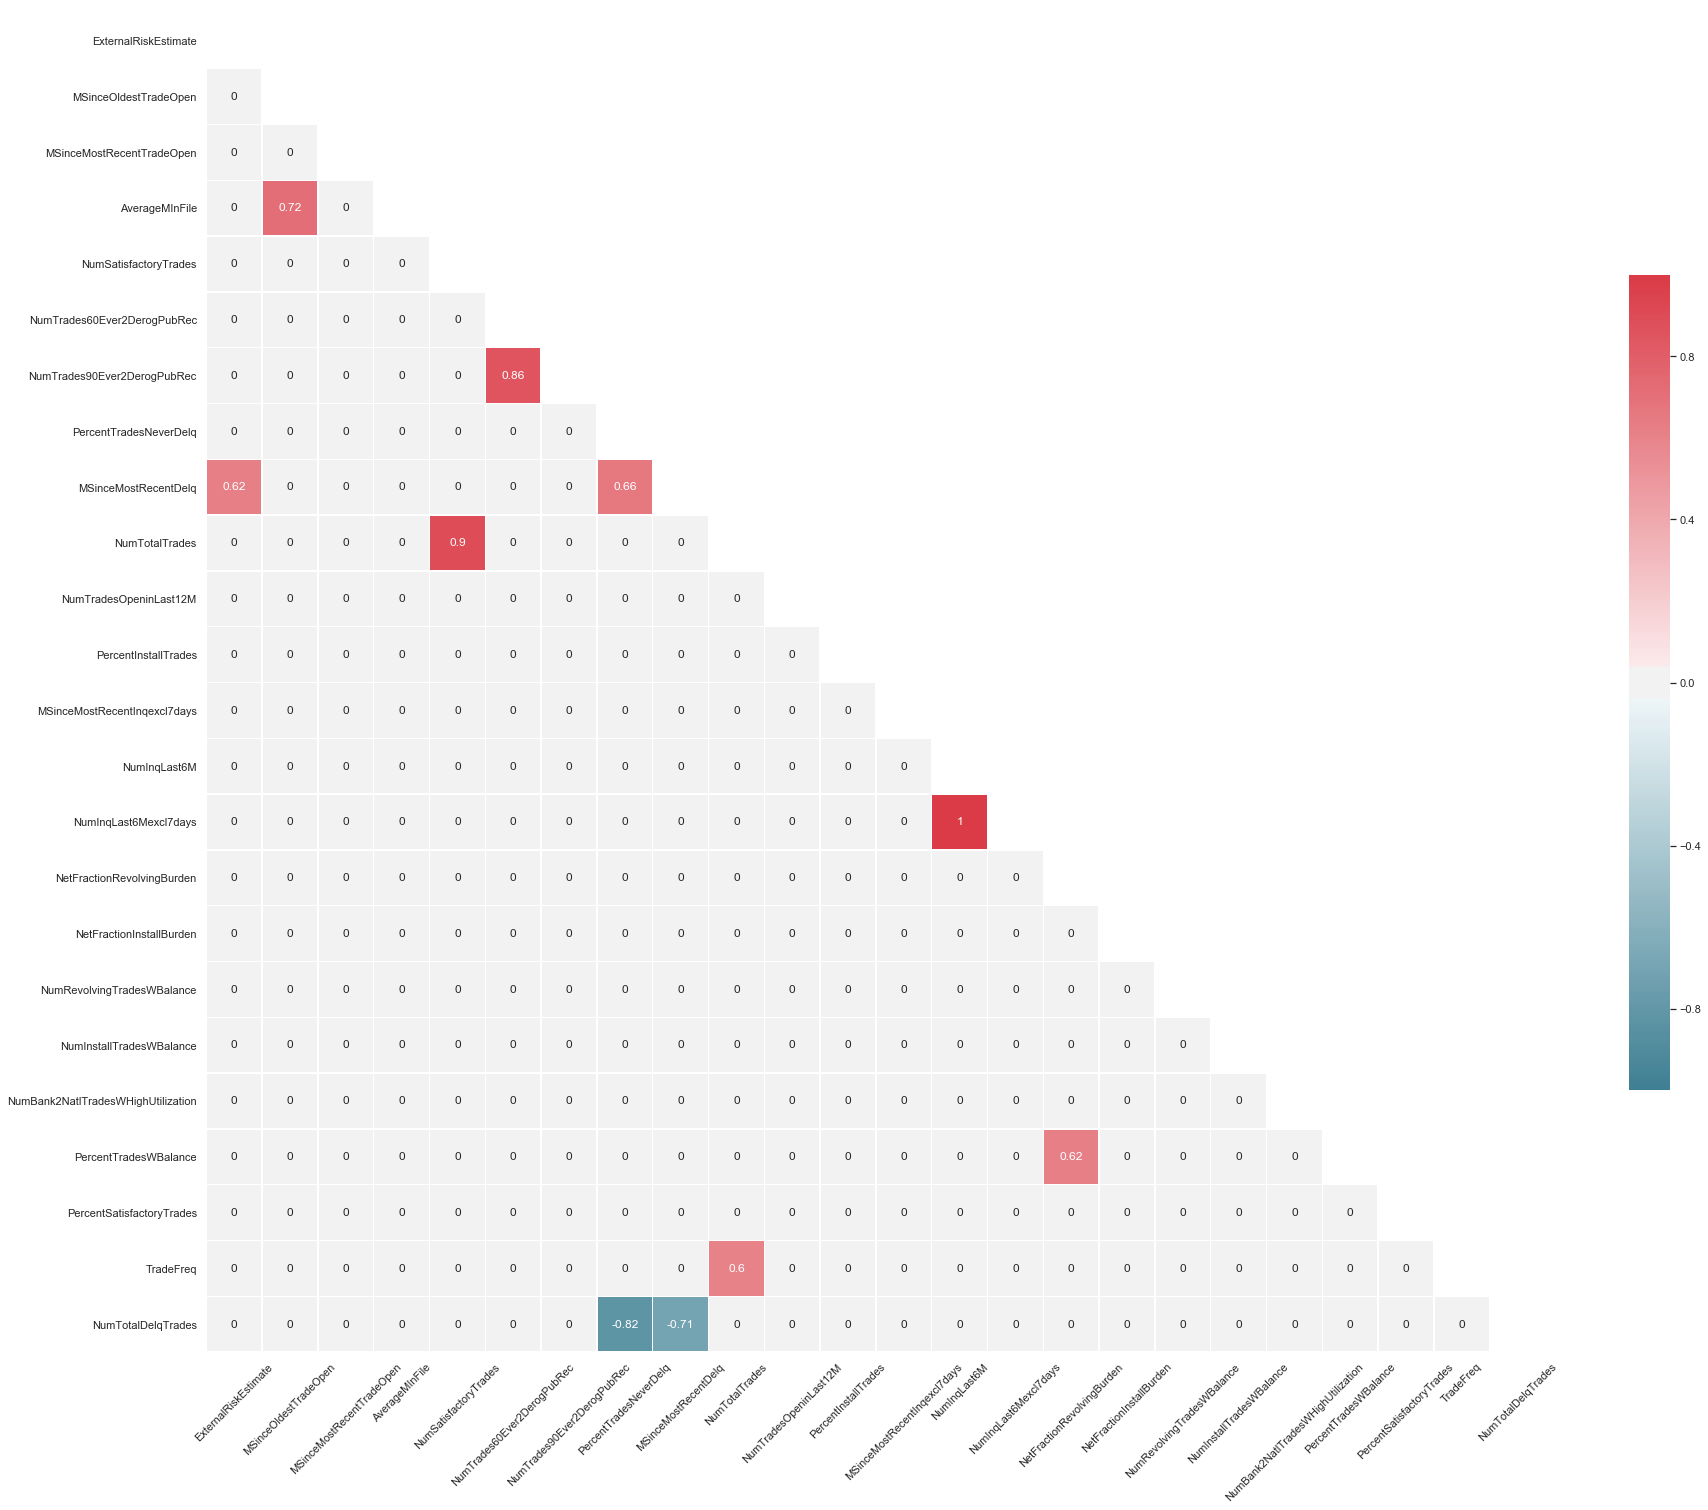

In [12]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")


# Calculate correlation of all pairs of continuous features
corr = df[continuous_columns].corr()

corr[np.abs(corr) < .6] = 0

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)

mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

NumInqLast6M and NumInqLast6Mexcl7days have correlation 1. This will cause problems for our random forests model, so we will  have to drop one of them. NumInqLast6Mexcl7days seems like the better choice as excluding inqueries within the last 7 days from the total number of inqueries in the last 6 months doesn't offer any more useful insight than the overall number inqueries in the last 6 months.  

In [13]:
df = df.drop('NumInqLast6Mexcl7days', axis=1)

NumTotalTrades and NumSatisfactoryTrades have .9 correlation, which is also high enough to cause problems for random forests. As NumTotalTrades and NumSatisfactoryTrades are both positive predictors for the target feature, we will drop NumTotalTrades as NumSatisfactoryTrades solely captures what we could reasonably expect to actual increase the likelihood of a 'good' RiskPerformance assessment, while NumTotalTrades also captures delinquent trades which could reasonably be assumed to increase likelihood of a 'bad' assessment.

In [14]:
df = df.drop('NumTotalTrades', axis=1)

In [15]:
continuous_columns = df[['ExternalRiskEstimate','MSinceOldestTradeOpen','MSinceMostRecentTradeOpen','AverageMInFile','NumSatisfactoryTrades','NumTrades60Ever2DerogPubRec','NumTrades90Ever2DerogPubRec','PercentTradesNeverDelq','MSinceMostRecentDelq','NumTradesOpeninLast12M','PercentInstallTrades','MSinceMostRecentInqexcl7days','NumInqLast6M','NetFractionRevolvingBurden','NetFractionInstallBurden','NumRevolvingTradesWBalance','NumInstallTradesWBalance','NumBank2NatlTradesWHighUtilization','PercentTradesWBalance','PercentSatisfactoryTrades','TradeFreq','NumTotalDelqTrades']].columns

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 <a list of 22 Text xticklabel objects>)

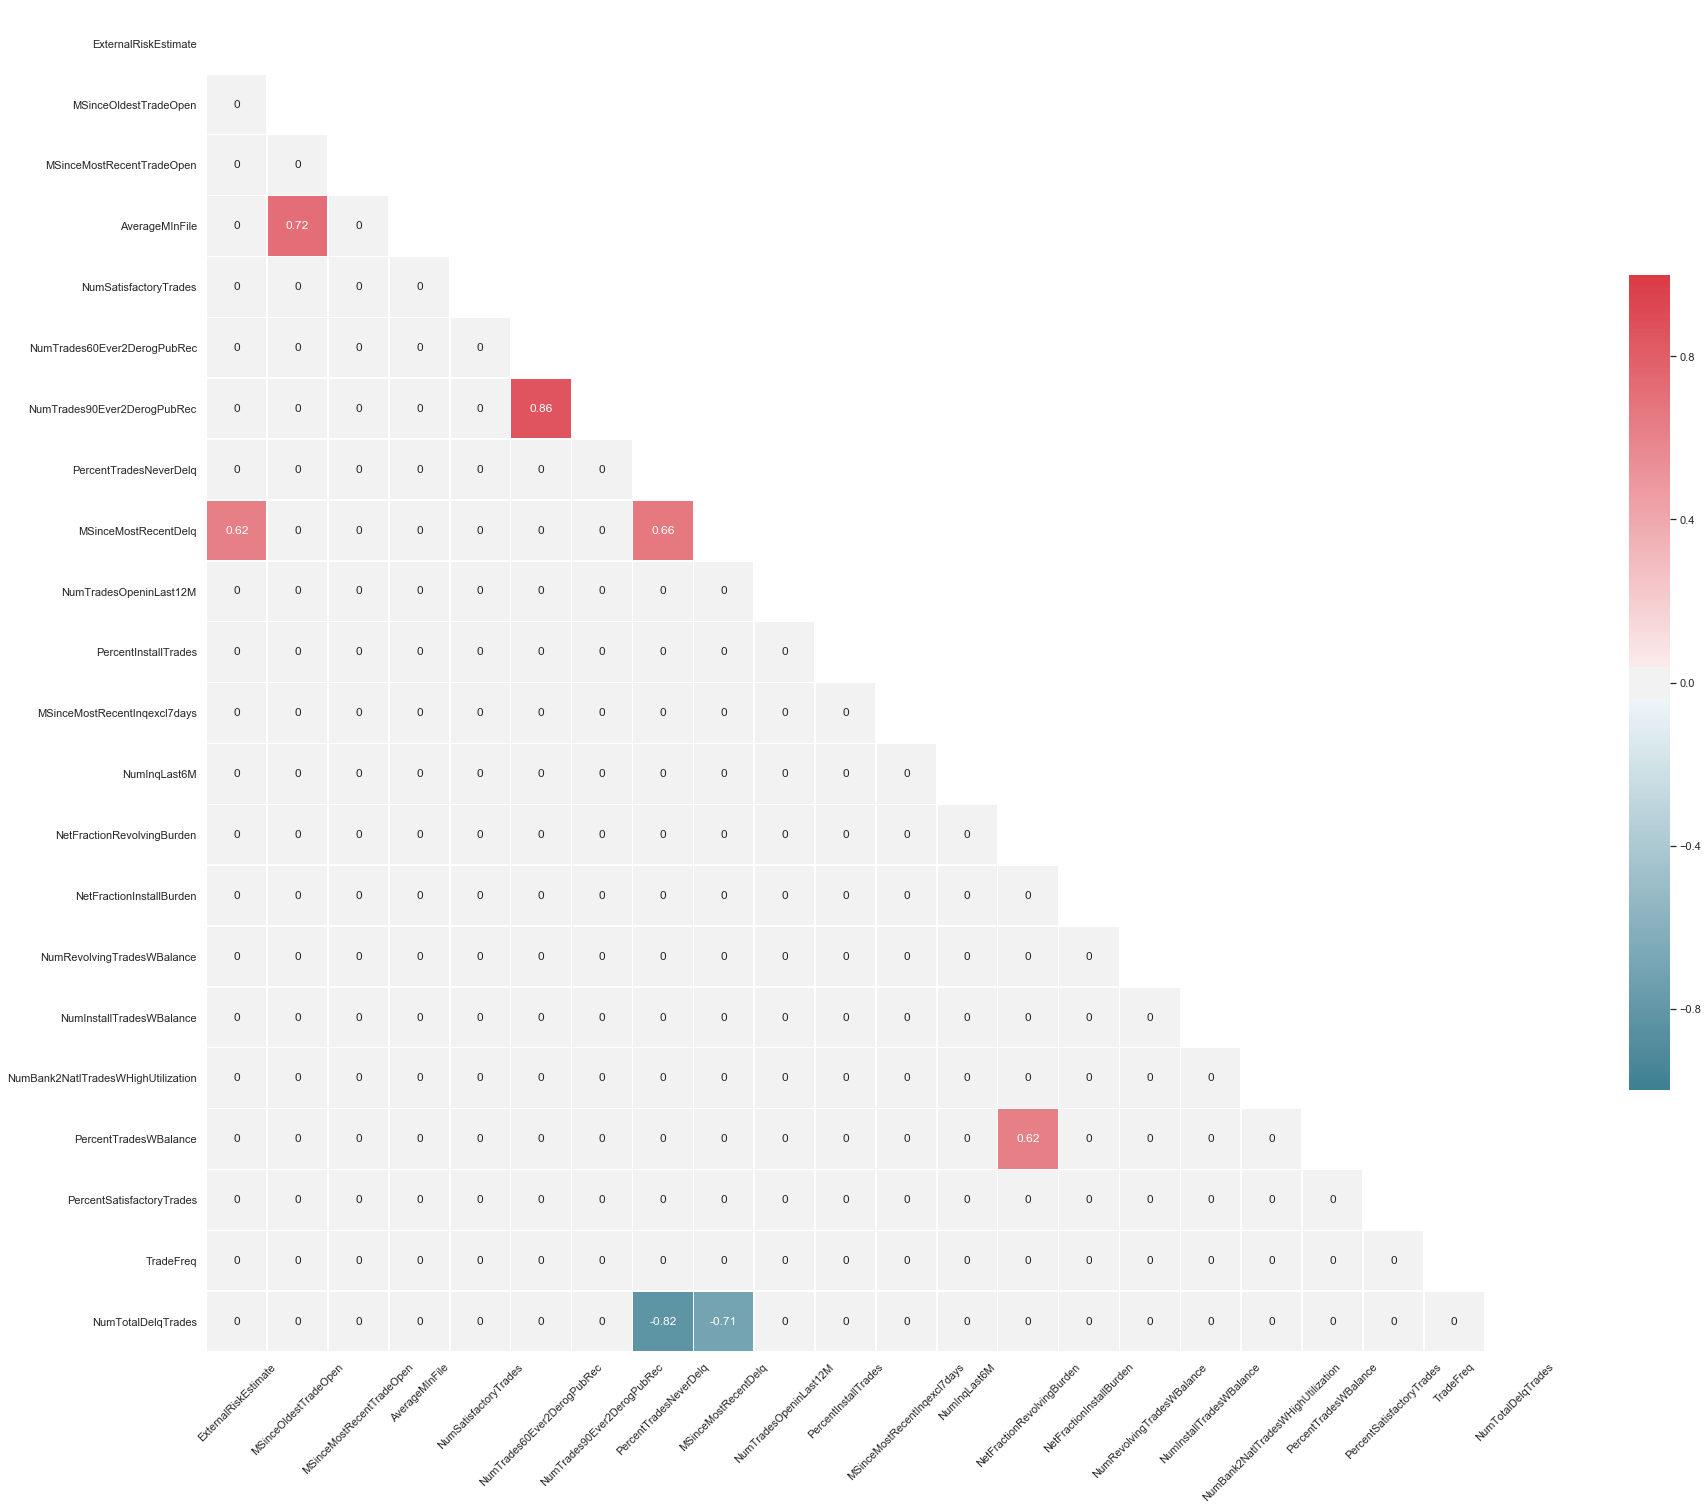

In [16]:

# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")


# Calculate correlation of all pairs of continuous features
corr = df[continuous_columns].corr()

corr[np.abs(corr) < .6] = 0

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)

mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

Taking 0.6 as the cut-off for a strong correlation, we can see from the heatmap that after dropping these two features the strong correlations we are left with are NumTrades60Ever2DerogPubRec with NumTrades90Ever2DerogPubRec (0.86), MSinceMostRecentDelq with ExternalRiskEstimate (0.82), AverageMInFile and MSinceOldestTradeOpen (0.72), PercentTradesNeverDelq and MSinceMostRecentDelq (0.66), PercentTradesNeverDelq and NumTotalDelqTrades (-0.82), MSinceMostRecentDelq and NumTotalDelqTrades (-0.71), and NetFractionRevolvingBurden and PercentTradesWBalance (0.62). We will now plot these features to get a better idea of what these correlations actually look like:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

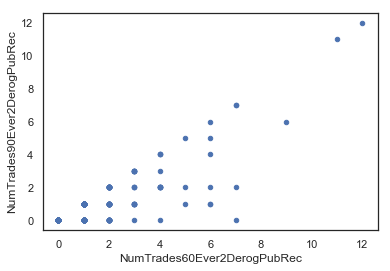

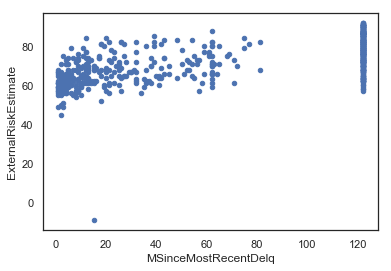

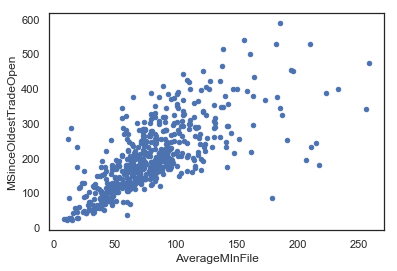

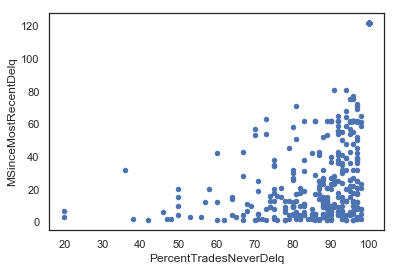

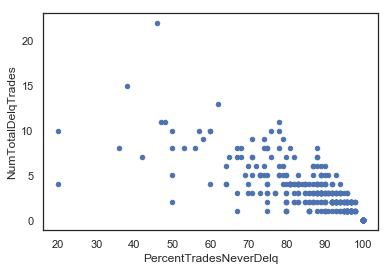

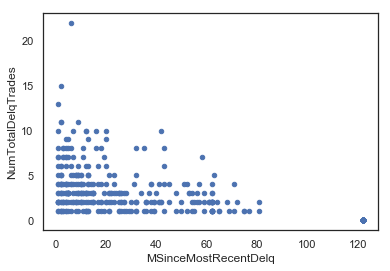

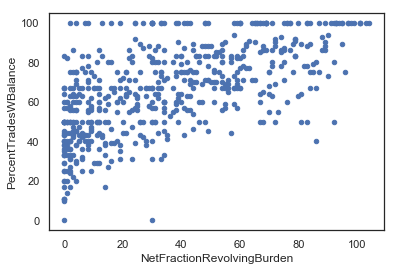

In [17]:
df.plot(kind='scatter', x='NumTrades60Ever2DerogPubRec', y='NumTrades90Ever2DerogPubRec')
df.plot(kind='scatter', x='MSinceMostRecentDelq', y='ExternalRiskEstimate')
df.plot(kind='scatter', x='AverageMInFile', y='MSinceOldestTradeOpen')
df.plot(kind='scatter', x='PercentTradesNeverDelq', y='MSinceMostRecentDelq')
df.plot(kind='scatter', x='PercentTradesNeverDelq', y='NumTotalDelqTrades')
df.plot(kind='scatter', x='MSinceMostRecentDelq', y='NumTotalDelqTrades')
df.plot(kind='scatter', x='NetFractionRevolvingBurden', y='PercentTradesWBalance')



The strong positive correlation between NumTrades60Ever2DerogPubRec and NumTrades90Ever2DerogPubRec is easily explained by the fact that the information captured by both overlaps, as someone with X number of trades over 60 must have X or more trades over 90. The strong positive correlation between AverageMInFile and MSinceOldestTradeOpen is also the result of two features conveying similar information. PercentTradesNeverDelq and NumTotalDelqTrades convey similar information from the opposite perspective, hence the correlation is strong but negative. 

The strong positive correlation between PercentTradesNeverDelq and MSinceMostRecentDelq could also have been predicted with some confidence as it follows that an account for whch delinquent trades make up a lower percentage of overall trades will have more time between now and it's last delinquent trade. The same logic applies in the case of MSinceMostRecentDelq and NumTotalDelqTrades, but in reverse in the sense that it could be reasonably expected that an account with a high number of delinquent trades will have less time between now and it's last delinquent trade.

As NetFractionRevolvingBurden increases with balance in relation to credit, it is not unusual that is is positively correlated with PercentTradesWBalance. Interestingly though, the scatterplot for these features reveals that there is a relatively consistent number of 100 values for PercentTradesWBalance fo the values of NetFractionRevolvingBurden, up to roughly 50. From the strong correlation between the ExternalRiskEstimate and MSinceMostRecentDelq, it could be surmised that the period that has past since an account has last had a delinquency is generally a significant factor in how these external risk estimates are calculated, although looking at vertical line shaped cluster of values at around 120 MSinceMostRecentDelq reveals that even having spent the past 10 years without making a delinquent trade is not enough to guarantee a perfect external risk estimate or even a high one in all cases. 

### Plotting Continuous Feature Interactions with the Target Feature for Feature Selection

We will now illustrate the interactions of our continuous features with our target feature using box plots:

<Figure size 432x288 with 0 Axes>

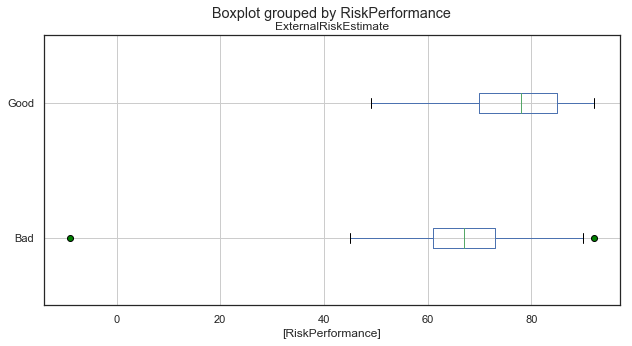

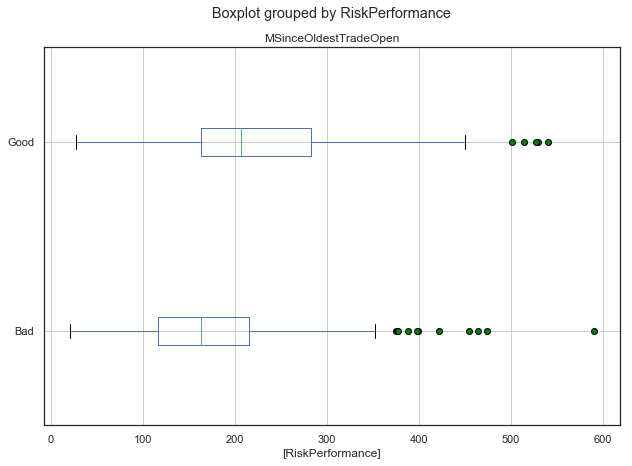

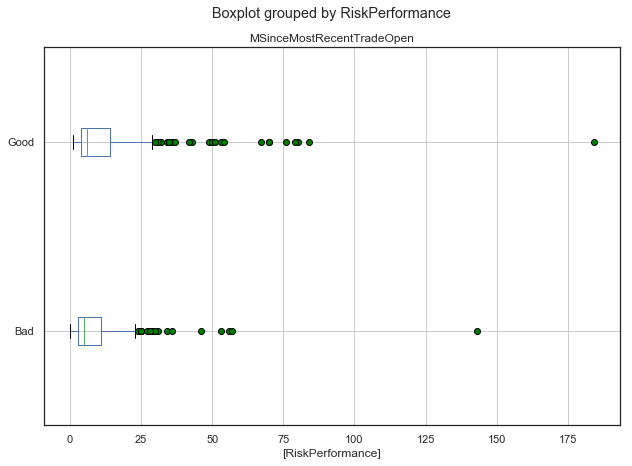

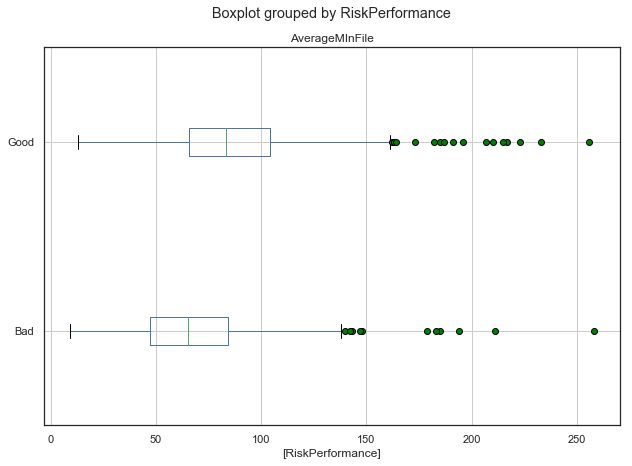

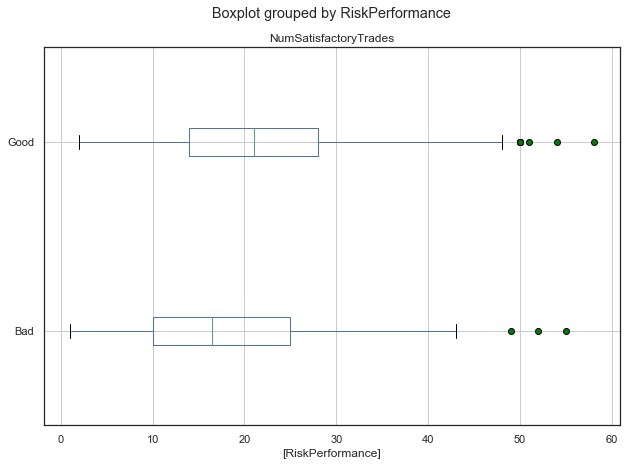

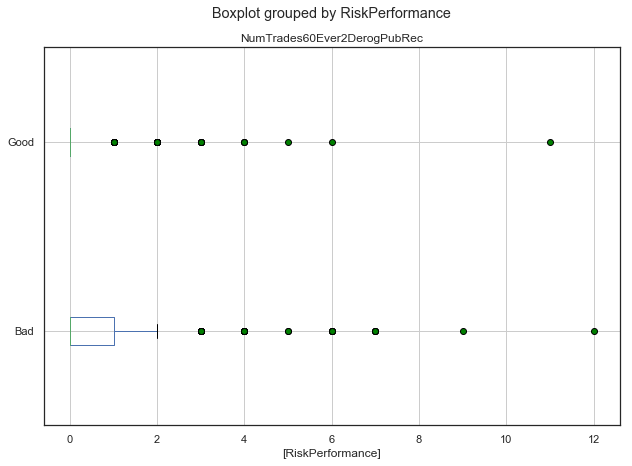

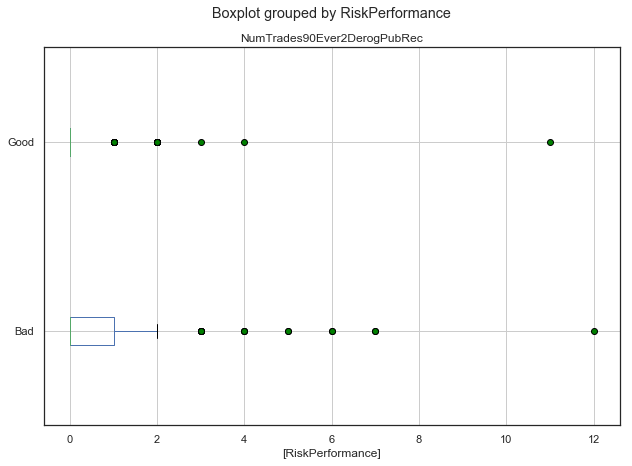

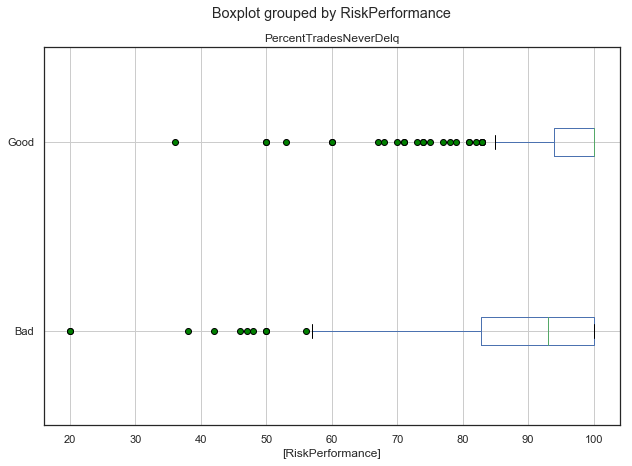

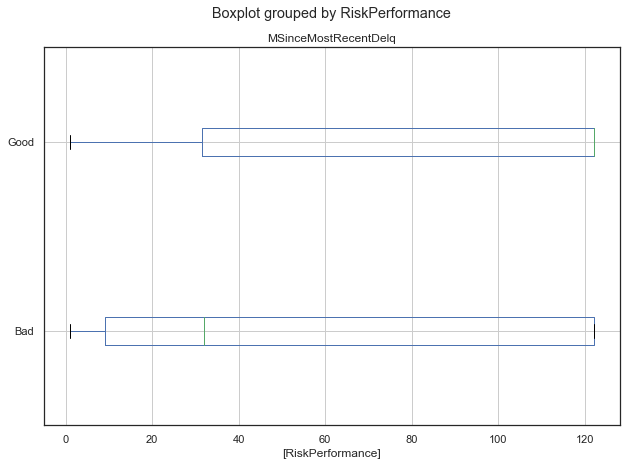

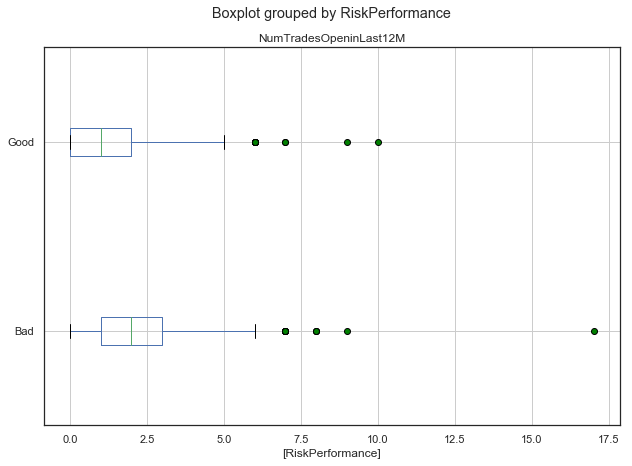

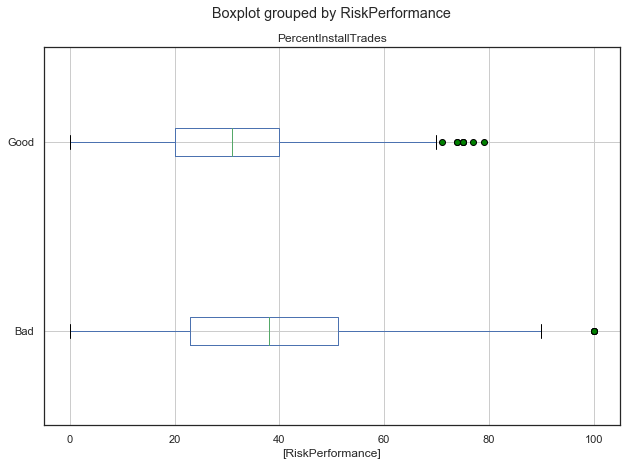

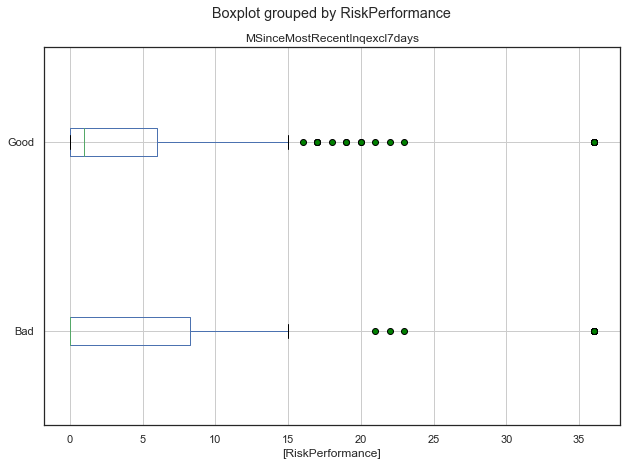

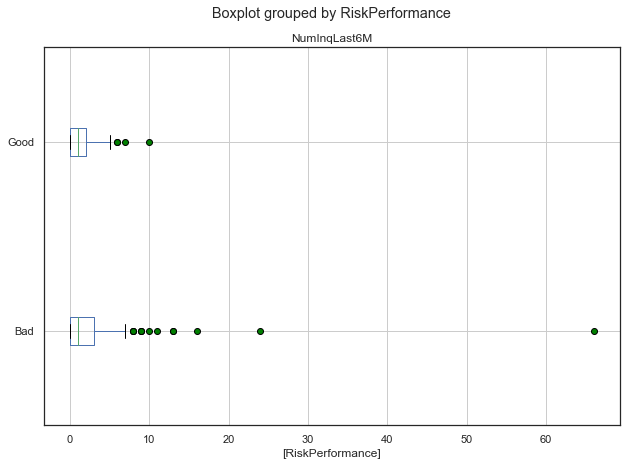

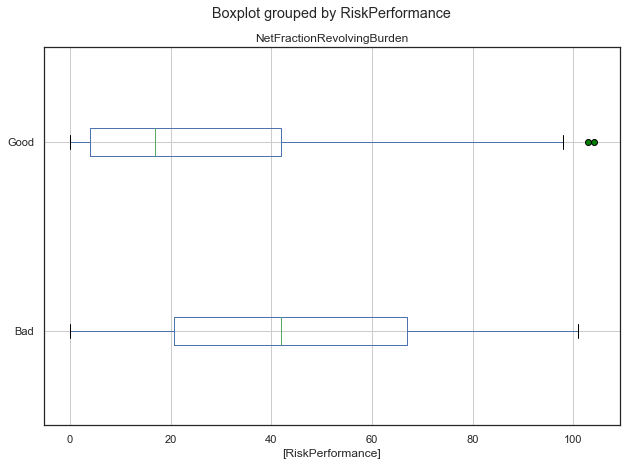

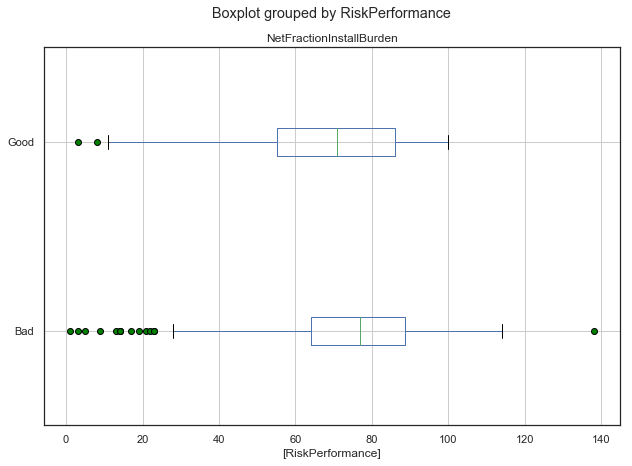

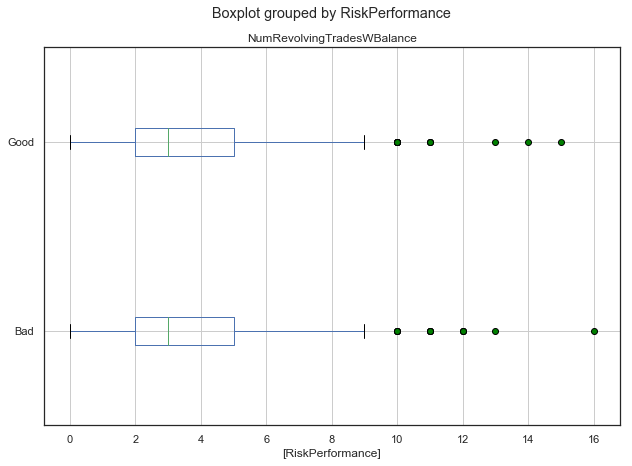

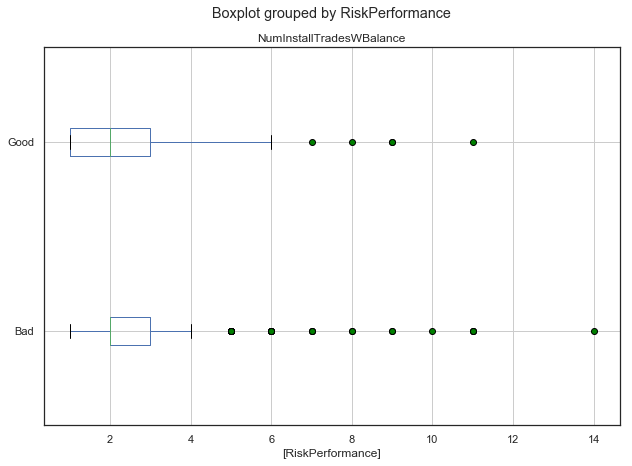

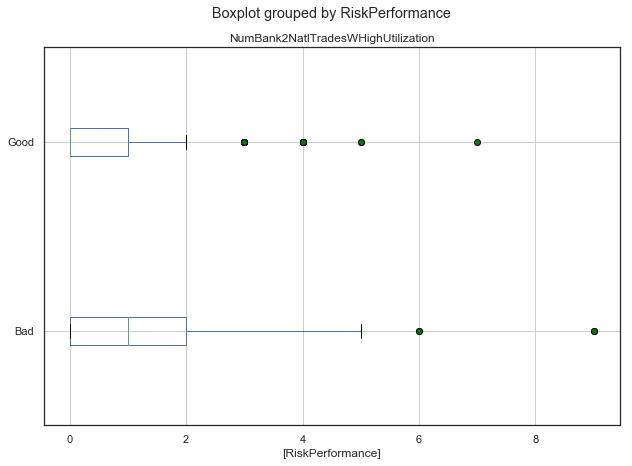

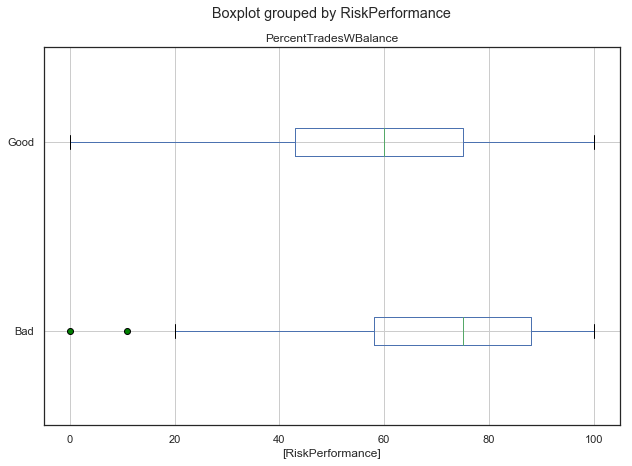

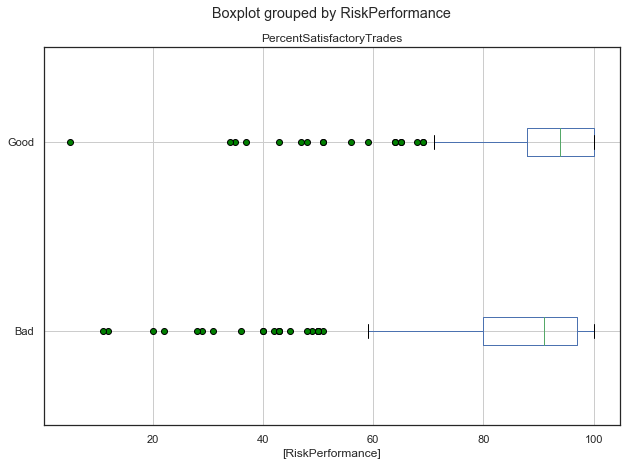

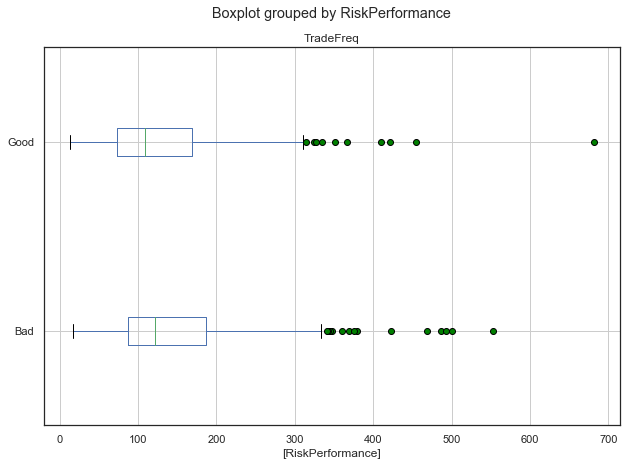

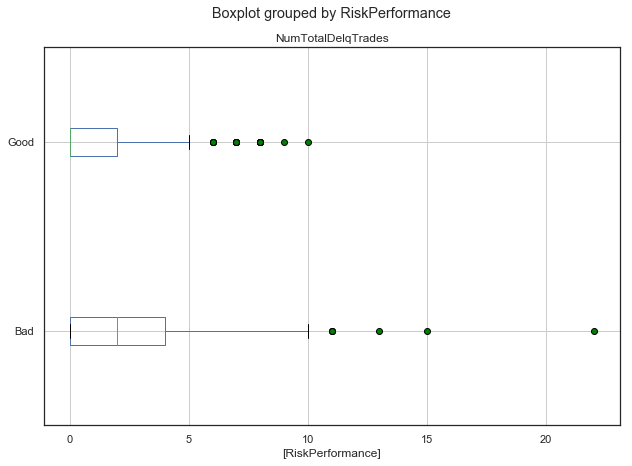

In [18]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')

df.boxplot(column=['ExternalRiskEstimate'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,5), vert=False)
df.boxplot(column=['MSinceOldestTradeOpen'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7), vert=False)
df.boxplot(column=['MSinceMostRecentTradeOpen'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7), vert=False)
df.boxplot(column=['AverageMInFile'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7), vert=False)
df.boxplot(column=['NumSatisfactoryTrades'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7), vert=False)
df.boxplot(column=['NumTrades60Ever2DerogPubRec'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7), vert=False)
df.boxplot(column=['NumTrades90Ever2DerogPubRec'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7), vert=False)
df.boxplot(column=['PercentTradesNeverDelq'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7), vert=False)
df.boxplot(column=['MSinceMostRecentDelq'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7), vert=False)
df.boxplot(column=['NumTradesOpeninLast12M'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7), vert=False)
df.boxplot(column=['PercentInstallTrades'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7), vert=False)
df.boxplot(column=['MSinceMostRecentInqexcl7days'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7), vert=False)
df.boxplot(column=['NumInqLast6M'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7), vert=False)
df.boxplot(column=['NetFractionRevolvingBurden'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7), vert=False)
df.boxplot(column=['NetFractionInstallBurden'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7), vert=False)
df.boxplot(column=['NumRevolvingTradesWBalance'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7), vert=False)
df.boxplot(column=['NumInstallTradesWBalance'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7), vert=False)
df.boxplot(column=['NumBank2NatlTradesWHighUtilization'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7), vert=False)
df.boxplot(column=['PercentTradesWBalance'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7), vert=False)
df.boxplot(column=['PercentSatisfactoryTrades'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7), vert=False)
df.boxplot(column=['TradeFreq'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7), vert=False)
df.boxplot(column=['NumTotalDelqTrades'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7), vert=False)

From the overlap between most of the boxes in our boxplots, we can see that not many of our continuous features have, on their own, a strong predictive effect either way on RiskPerformance, with the most pronounced difference between the interqauratile ranges being observable in NetFractionRevolvingBurden. That said, we can seperate the plots with heavily overlapping interquartile ranges from those with less overlapping interquartile ranges which show a significantly higher proportion of good/bad values as the feature in question rises. As nearly all features show some difference between their interquartile ranges for good and bad, it is essentially a judgement call as to which of these plots show a pronounced difference, but in my view these include ExternalRiskEstimate, MSinceOldestTradeOpen, AverageMInFile, NumSatisfactoryTrades, NumTradesOpeninLast12M, PercentInstallTrades, NetFractionRevolvingBurden and PercentTradesWBalance. Going on, these will be the subset of continuous features we will use in creating our predictive models.

In [19]:
continuous_subset = df[['ExternalRiskEstimate','MSinceOldestTradeOpen','AverageMInFile','NumSatisfactoryTrades','NumTradesOpeninLast12M','PercentInstallTrades','NetFractionRevolvingBurden','PercentTradesWBalance']].columns

### Plotting Categorical Feature Interaction with the Target Feature for Feature Selection

We will now investigate the interactions of the categorical features with the target feature using stacked bar plots:

(0, 100)

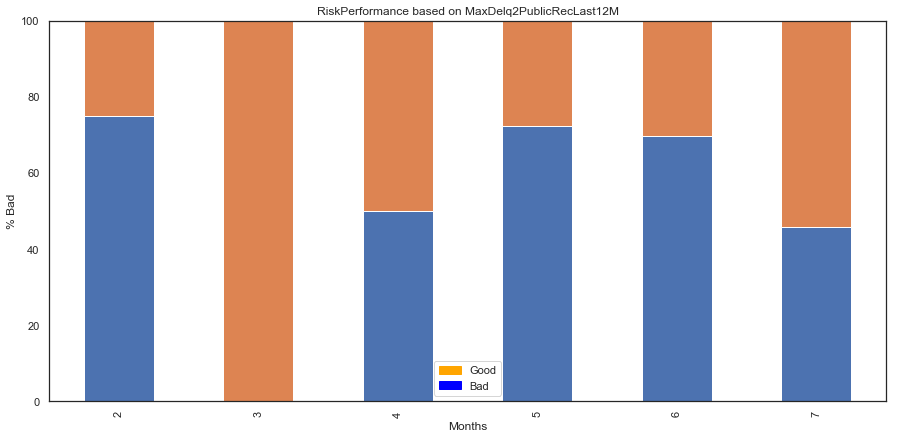

In [20]:
MaxDelq2PublicRecLast12M = pd.unique(df.MaxDelq2PublicRecLast12M.ravel())

df['percent'] = 0

for i in MaxDelq2PublicRecLast12M:
    count = 1 / df[df.MaxDelq2PublicRecLast12M == i].count()['RiskPerformance']
    index_list = df[df['MaxDelq2PublicRecLast12M'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count * 100
        
group = df[['percent','RiskPerformance','MaxDelq2PublicRecLast12M']].groupby(['MaxDelq2PublicRecLast12M','RiskPerformance']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="RiskPerformance based on MaxDelq2PublicRecLast12M", figsize=(15,7))

orange_patch = mpatches.Patch(color='orange', label='Good')
blue_patch = mpatches.Patch(color='blue', label='Bad')
my_plot.legend(handles=[orange_patch, blue_patch], frameon = True)

my_plot.set_xlabel("Months")
my_plot.set_ylabel("% Bad")
my_plot.set_ylim([0,100])

The relationship between MaxDelq2PublicRecLast12M and RiskPerformance seems to be non-linear from 2-4 despite the fact that these categories represent a linear progression through 120+, 90 and 60 days delinquent. 7 represents both current and never delinquent so it's bar does not offer any real insight. 5 and 6 both represent unknown delinquency, which we can see corresponds to a bad value roughly 70% of the time, just under the percentage for 120+ days.

(0, 100)

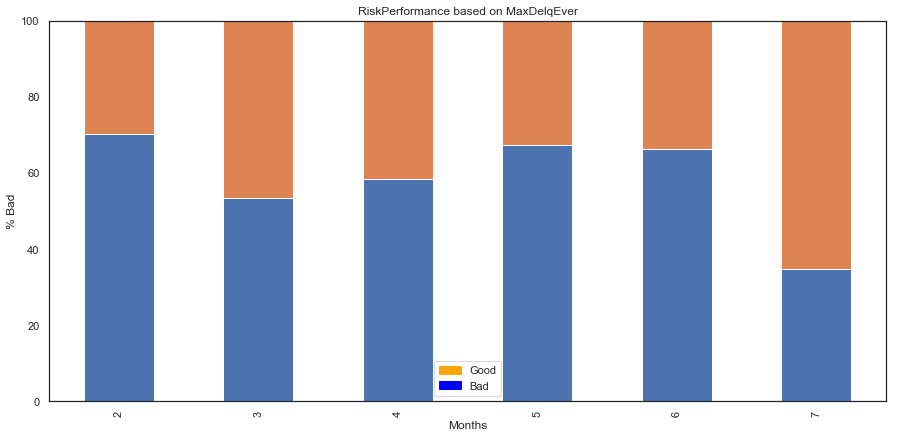

In [21]:
MaxDelqEver = pd.unique(df.MaxDelqEver.ravel())

df['percent'] = 0

for i in MaxDelqEver:
    count = 1 / df[df.MaxDelqEver == i].count()['RiskPerformance']
    index_list = df[df['MaxDelqEver'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count * 100
        
group = df[['percent','RiskPerformance','MaxDelqEver']].groupby(['MaxDelqEver','RiskPerformance']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="RiskPerformance based on MaxDelqEver", figsize=(15,7))

orange_patch = mpatches.Patch(color='orange', label='Good')
blue_patch = mpatches.Patch(color='blue', label='Bad')
my_plot.legend(handles=[orange_patch, blue_patch], frameon = True)

my_plot.set_xlabel("Months")
my_plot.set_ylabel("% Bad")
my_plot.set_ylim([0,100])

The values represented by each number for MaxDelqEver are different than from MaxDelq2PublicRecLast12M, but in this case we would expect to see a linear relationship with the 'Good' to 'Bad' ratio between 3 and 6 (from 120+ days delinquent through 30 days delinquent as in MaxDelq2PublicRecLast12M). However, this is again not the case with the percentage of 'Bad' values increasing from 3 to 5 and then slighly decreasing from 5 to 6. 

(0, 100)

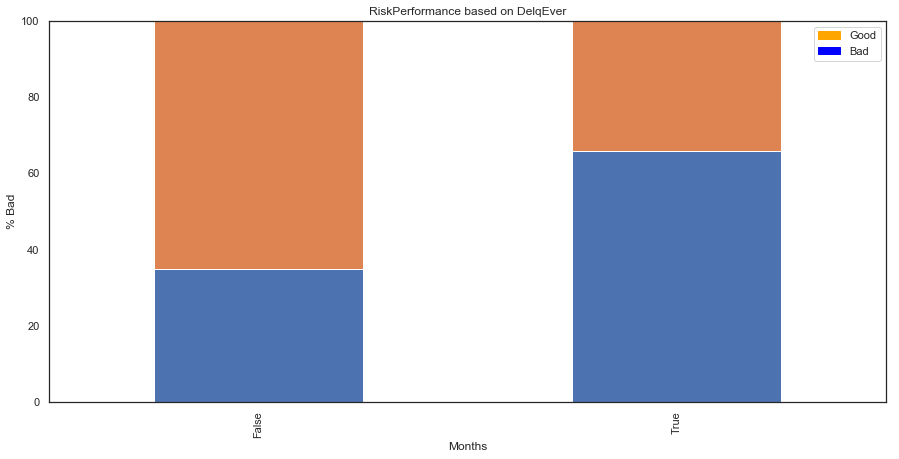

In [22]:
DelqEver = pd.unique(df.DelqEver.ravel())

df['percent'] = 0

for i in DelqEver:
    count = 1 / df[df.DelqEver == i].count()['RiskPerformance']
    index_list = df[df['DelqEver'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count * 100
        
group = df[['percent','RiskPerformance','DelqEver']].groupby(['DelqEver','RiskPerformance']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="RiskPerformance based on DelqEver", figsize=(15,7))

orange_patch = mpatches.Patch(color='orange', label='Good')
blue_patch = mpatches.Patch(color='blue', label='Bad')
my_plot.legend(handles=[orange_patch, blue_patch], frameon = True)

my_plot.set_xlabel("Months")
my_plot.set_ylabel("% Bad")
my_plot.set_ylim([0,100])

DelqEver is a more useful predictor for RiskPerformance as it only has two cargories and we can see a significant difference in the distribution of 'Good' and 'Bad' values between them, with True corresponding to a 'Bad' assessment more often than False. Another reason this feature is promising is that, as it is binary, it could be easily be represented with a dummy variable and used in the same way as the continuous features.

(0, 100)

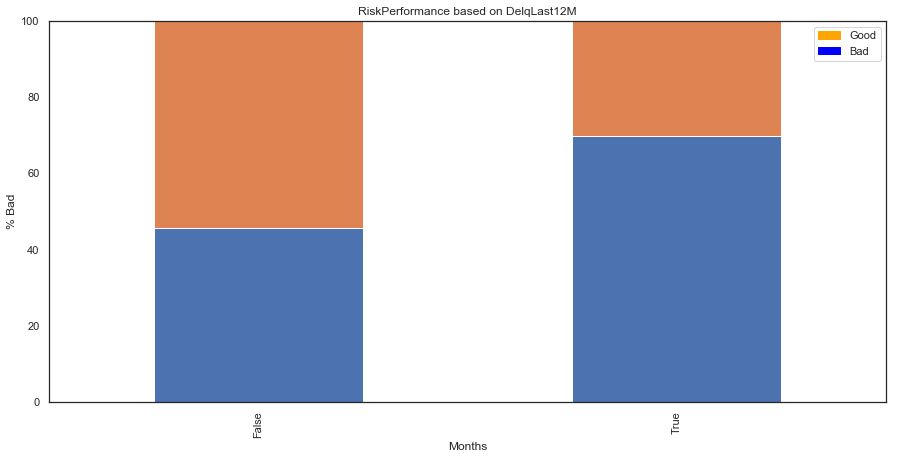

In [23]:
DelqLast12M = pd.unique(df.DelqLast12M.ravel())

df['percent'] = 0

for i in DelqLast12M:
    count = 1 / df[df.DelqLast12M == i].count()['RiskPerformance']
    index_list = df[df['DelqLast12M'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count * 100
        
group = df[['percent','RiskPerformance','DelqLast12M']].groupby(['DelqLast12M','RiskPerformance']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="RiskPerformance based on DelqLast12M", figsize=(15,7))

orange_patch = mpatches.Patch(color='orange', label='Good')
blue_patch = mpatches.Patch(color='blue', label='Bad')
my_plot.legend(handles=[orange_patch, blue_patch], frameon = True)

my_plot.set_xlabel("Months")
my_plot.set_ylabel("% Bad")
my_plot.set_ylim([0,100])

For the same reasons as DelqEver, DelqLast12M is more useful as a predictor of RiskPerformance than MaxDelq2PublicRecLast12M and MaxDelqEver. 

For the reasons stated in this section, the subset of categorical features that will be used going forward are DelqEver and DelqLast12M.

In [24]:
categorical_subset = df[['DelqEver','DelqLast12M']].columns

# Part II: Linear Regression

### Training

Before we train our linear regression model, we will convert the values in our selected categorical features, DelqEver and DelqLast12M, to binary dummy variables, with 0 representing false and 1 representing true. We must also do the same for RiskPerformance, where 1 will be used to represent 'Bad'.

In [25]:
df = df.rename(index=str, columns={"DelqLast12M": "DelqLast12MNonDummy"})
df['DelqLast12M'] = df.DelqLast12MNonDummy.map({True:1, False:0})
df = df.rename(index=str, columns={"DelqEver": "DelqEverNonDummy"})
df['DelqEver'] = df.DelqEverNonDummy.map({True:1, False:0})
df = df.rename(index=str, columns={"RiskPerformance": "RiskPerformanceNonDummy"})
df['RiskPerformance'] = df.RiskPerformanceNonDummy.map({'Bad':1, 'Good':0})

df[['DelqEver', 'DelqLast12M', 'RiskPerformance']].head()

,DelqEver,DelqLast12M,RiskPerformance
815,1,1,1
523,1,1,1
737,0,0,1
781,1,0,0
619,1,0,1


We will now put all of our selected descriptive features together:

In [26]:
selected_columns = df[['DelqEver', 'DelqLast12M', 'ExternalRiskEstimate','MSinceOldestTradeOpen','AverageMInFile','NumSatisfactoryTrades','NumTradesOpeninLast12M','PercentInstallTrades','NetFractionRevolvingBurden','PercentTradesWBalance']].columns
df[selected_columns].head()

,DelqEver,DelqLast12M,ExternalRiskEstimate,MSinceOldestTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTradesOpeninLast12M,PercentInstallTrades,NetFractionRevolvingBurden,PercentTradesWBalance
815,1,1,51,91,27,7,3,63,76,100
523,1,1,56,256,88,38,2,23,25,59
737,0,0,77,51,29,19,1,32,0,64
781,1,0,70,217,88,29,6,50,10,67
619,1,0,71,174,79,22,2,35,31,64


We can now move on to training our multiple linear regression model:

In [27]:
train_X = df[selected_columns]
train_y = df.RiskPerformance

multiple_linreg = LinearRegression().fit(train_X[selected_columns], train_y)

### Analysing the Model Coefficients

In [28]:
print("Features: \n", selected_columns)
print()
print("Coeficients: \n", multiple_linreg.coef_)
print("\nIntercept: \n", multiple_linreg.intercept_)

Features: 
 Index(['DelqEver', 'DelqLast12M', 'ExternalRiskEstimate',
       'MSinceOldestTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades',
       'NumTradesOpeninLast12M', 'PercentInstallTrades',
       'NetFractionRevolvingBurden', 'PercentTradesWBalance'],
      dtype='object')

Coeficients: 
 [ 0.1590117  -0.01996608 -0.01170116 -0.00027379 -0.00090132 -0.0087944
  0.0305862   0.00189067  0.00091828  0.00046393]

Intercept: 
 1.3927440224513816


The coefficients above tells us for each feature involved in the regression whether or not it is a predictor of a 'Good' or 'Bad' RiskPerformance (if the coefficient is negative or positive, respectively) and it's predictive strength (the coefficient's magnitude). The intercept value tells us the 'default' RiskPerformance of the average account which is 1.4, 0.9 over the 0.5 threshold for 'Bad', meaning that a theoretical account with values of 0 for each feature would be predicted to have 'Bad' RiskPerformance.

The strongest predictor which takes a binary value from our linear regression is 'DelqEver' at ~0.16, meaning that accounts with any delinquent trades in their history are significantly more likely to be classified as having a bad risk (that is to say, too high a risk) of default. Below, we calculate the average contribution of each feature to a prediction made by the model in order to evaluate which features have in practise have the most impact on our prediction:    

In [29]:
avg_DelqEver_effect = (df['DelqEver'].mean())*multiple_linreg.coef_[0]
avg_DelqLast12M_effect = (df['DelqLast12M'].mean())*multiple_linreg.coef_[1]
avg_ExternalRiskEstimate_effect = (df['ExternalRiskEstimate'].mean())*multiple_linreg.coef_[2]
avg_MSinceOldestTradeOpen_effect = (df['MSinceOldestTradeOpen'].mean())*multiple_linreg.coef_[3]
avg_AverageMInFile_effect = (df['AverageMInFile'].mean())*multiple_linreg.coef_[4]
avg_NumSatisfactoryTrades_effect = (df['NumSatisfactoryTrades'].mean())*multiple_linreg.coef_[5]
avg_NumTradesOpeninLast12M_effect = (df['NumTradesOpeninLast12M'].mean())*multiple_linreg.coef_[6]
avg_PercentInstallTrades_effect = (df['PercentInstallTrades'].mean())*multiple_linreg.coef_[7]
avg_NetFractionRevolvingBurden_effect = (df['NetFractionRevolvingBurden'].mean())*multiple_linreg.coef_[8]
avg_PercentTradesWBalance_effect = (df['PercentTradesWBalance'].mean())*multiple_linreg.coef_[9]

print("Average contribution of DelqEver to prediction:", avg_DelqEver_effect)
print("Average contribution of DelqLast12M to prediction:", avg_DelqLast12M_effect)
print("Average contribution of ExternalRiskEstimate to prediction:", avg_ExternalRiskEstimate_effect)
print("Average contribution of MSinceOldestTradeOpen to prediction:", avg_MSinceOldestTradeOpen_effect)
print("Average contribution of AverageMInFile to prediction:", avg_AverageMInFile_effect)
print("Average contribution of NumSatisfactoryTrades to prediction:", avg_NumSatisfactoryTrades_effect)
print("Average contribution of NumTradesOpeninLast12M to prediction:", avg_NumTradesOpeninLast12M_effect)
print("Average contribution of PercentInstallTrades to prediction:", avg_PercentInstallTrades_effect)
print("Average contribution of NetFractionRevolvingBurden to prediction:", avg_NetFractionRevolvingBurden_effect)
print("Average contribution of PercentTradesWBalance to prediction:", avg_PercentTradesWBalance_effect)

Average contribution of DelqEver to prediction: 0.08536991531649649
Average contribution of DelqLast12M to prediction: -0.0047603528508739406
Average contribution of ExternalRiskEstimate to prediction: -0.842483686098334
Average contribution of MSinceOldestTradeOpen to prediction: -0.05453927889587548
Average contribution of AverageMInFile to prediction: -0.07127523496001364
Average contribution of NumSatisfactoryTrades to prediction: -0.17854293753215963
Average contribution of NumTradesOpeninLast12M to prediction: 0.05839183291975536
Average contribution of PercentInstallTrades to prediction: 0.06693882364858213
Average contribution of NetFractionRevolvingBurden to prediction: 0.03217765159345165
Average contribution of PercentTradesWBalance to prediction: 0.030559004270368072


With a prediction of above 0.5 being the threshold used for evaluating an account as 'Bad' RiskPerformance, we can see above that ExternalRiskEstimate, contributing ~-0.84 to a prediction on average, is generally nearly the sole deciding factor, dominating the effect of the 'Bad' predictors:

In [30]:
print("Average effect of ExternalRiskEstimate:", avg_ExternalRiskEstimate_effect)
average_bad_prediction = (avg_DelqEver_effect  + avg_NumTradesOpeninLast12M_effect + avg_PercentInstallTrades_effect + avg_NetFractionRevolvingBurden_effect + avg_PercentTradesWBalance_effect)
print("Average effect of all 'Bad' predictors combined:", average_bad_prediction)
average_prediction_no_ERE = multiple_linreg.intercept_ + avg_DelqEver_effect + avg_DelqLast12M_effect + avg_MSinceOldestTradeOpen_effect + avg_AverageMInFile_effect + avg_NumSatisfactoryTrades_effect + avg_NumTradesOpeninLast12M_effect + avg_PercentInstallTrades_effect + avg_NetFractionRevolvingBurden_effect + avg_PercentTradesWBalance_effect 
print("Average prediction without ExternalRiskEstimate:", average_prediction_no_ERE)
print("Average prediction:", average_prediction_no_ERE + avg_ExternalRiskEstimate_effect)

Average effect of ExternalRiskEstimate: -0.842483686098334
Average effect of all 'Bad' predictors combined: 0.2734372277486537
Average prediction without ExternalRiskEstimate: 1.3570634459611124
Average prediction: 0.5145797598627784


As shown above, the inclusion of the average effect of ExternalRiskEstimate is only ~0.2 off changing the class of the average prediction. From this I conclude that a single linear regression model using ExternalRiskEstmate would usually produce the same prediction as our multiple linear regression model.

### Prediction and Evaluation

We will now introduce a threshold of 0.5 for the probability predictions of our model to store predictions as binary class (less than 0.5 is 'Good', otherwise 'Bad').

In [31]:
multiple_linreg_predictions = multiple_linreg.predict(train_X[selected_columns])

df['LinearProbability'] = multiple_linreg_predictions

df['LinearPrediction'] = df['LinearProbability']

df['LinearPrediction'][(df['LinearPrediction'] >= 0.5)] = 1

df['LinearPrediction'][df['LinearPrediction'] != 1] = 0

df[['LinearProbability', 'LinearPrediction', 'RiskPerformance']].head(100)



,LinearProbability,LinearPrediction,RiskPerformance
815,1.151273,1.0,1
523,0.547919,1.0,1
737,0.405339,0.0,1
781,0.657226,1.0,0
619,0.594158,1.0,1
729,0.825186,1.0,1
370,0.015195,0.0,0
151,0.583713,1.0,0
73,0.338810,0.0,0
331,0.582025,1.0,0


To get a rough ideas of our model's accuracy we will compare their mean values:

In [32]:
print("Our mean prediction is:", df['LinearPrediction'].mean())
print("The most common RiskPerformance value is:", df['RiskPerformance'].mean())

Our mean prediction is: 0.5471698113207547
The most common RiskPerformance value is: 0.5145797598627787


We will now calculate and examine the confusion matrix and following evaluation metrics: normalized accuracy, f1 score, precision and recall (as well as mean_abs_err, root_mean_squared_error and r_squared_error to use later).

In [33]:
confusion_matrix = metrics.confusion_matrix(df['RiskPerformance'], df['LinearPrediction'])
normalized_acc = metrics.accuracy_score(df['LinearPrediction'], df['RiskPerformance'])
f1_score = metrics.f1_score(df['RiskPerformance'], df['LinearPrediction'])
precision = metrics.precision_score(df['RiskPerformance'], df['LinearPrediction'])
recall = metrics.recall_score(df['RiskPerformance'], df['LinearPrediction'])

In [34]:
mean_abs_err = metrics.mean_absolute_error(df['RiskPerformance'], df['LinearPrediction'])
root_mean_squared_error = (metrics.mean_squared_error(df['RiskPerformance'], df['LinearPrediction']))**0.5
r_squared_score= metrics.r2_score(df['RiskPerformance'], df['LinearPrediction'])

In [35]:
print("Normalized accuracy score:", normalized_acc)
print("F1 score:", f1_score)
print("Precision:", precision)
print("Recall:", recall)



Normalized accuracy score: 0.7341337907375644
F1 score: 0.7495961227786753
Precision: 0.7272727272727273
Recall: 0.7733333333333333


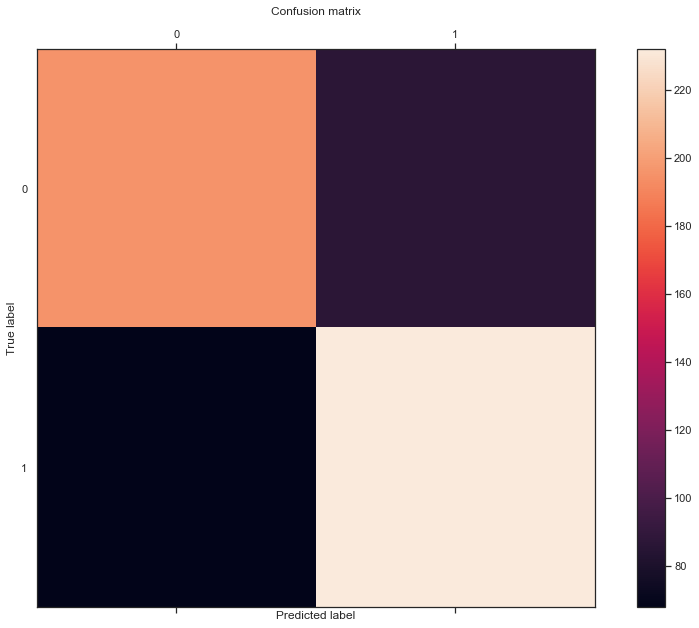

In [36]:
plt.figure(figsize=(15,10))
plt.matshow(confusion_matrix, fignum=1)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Our normalized accuracy score is ~0.73, meaning that the model correctly predicts if an account would be assessed as 'Bad' or 'Good' RiskPerformance approximately 73% of the time. We can see that the model has significantly better recall than precision, (~0.77 vs. ~0.73, respectively), meaning that the model is better at making correct predictions for accounts that should be classified as 'Bad' RiskPerformance than accounts which should be classified as 'Good' RiskPerformance, i.e. it is more inclined to classify an account as 'Bad' than would be ideal with respect to accuracy.

### Evaluation on Test Data Set

Performing the same evalution measures on the hold-out test set as were performed on the training set above:

In [37]:
test = test.rename(index=str, columns={"DelqLast12M": "DelqLast12MNonDummy"})
test['DelqLast12M'] = test.DelqLast12MNonDummy.map({True:1, False:0})
test = test.rename(index=str, columns={"DelqEver": "DelqEverNonDummy"})
test['DelqEver'] = test.DelqEverNonDummy.map({True:1, False:0})
test = test.rename(index=str, columns={"RiskPerformance": "RiskPerformanceNonDummy"})
test['RiskPerformance'] = test.RiskPerformanceNonDummy.map({'Bad':1, 'Good':0})

test[['DelqEver', 'DelqLast12M', 'RiskPerformance']].head()

,DelqEver,DelqLast12M,RiskPerformance
594,0,0,1
260,1,0,1
321,1,1,1
115,0,0,0
452,1,0,0


In [38]:
test_X = test[selected_columns]
test_y = test.RiskPerformance

In [39]:
test_multiple_linreg_predictions = multiple_linreg.predict(test_X[selected_columns])

test['LinearProbability'] = test_multiple_linreg_predictions

test['LinearPrediction'] = test['LinearProbability']

test['LinearPrediction'][(test['LinearPrediction'] >= 0.5)] = 1

test['LinearPrediction'][test['LinearPrediction'] != 1] = 0

In [40]:
test[['LinearProbability', 'LinearPrediction', 'RiskPerformance']].head(10)

,LinearProbability,LinearPrediction,RiskPerformance
594,0.638264,1.0,1
260,0.737916,1.0,1
321,0.608406,1.0,1
115,0.516136,1.0,0
452,0.538192,1.0,0
799,0.351750,0.0,1
454,0.450521,0.0,0
588,0.712377,1.0,1
11,0.744133,1.0,1
184,0.845122,1.0,1


In [41]:
linear_test_normalized_acc = metrics.accuracy_score(test['RiskPerformance'], test['LinearPrediction'])
linear_test_confusion_matrix = metrics.confusion_matrix(test['RiskPerformance'], test['LinearPrediction'])
linear_test_f1_score = metrics.f1_score(test['RiskPerformance'], test['LinearPrediction'])
linear_test_precision = metrics.precision_score(test['RiskPerformance'], test['LinearPrediction'])
linear_test_recall = metrics.recall_score(test['RiskPerformance'], test['LinearPrediction'])

Test set confusion matrix:

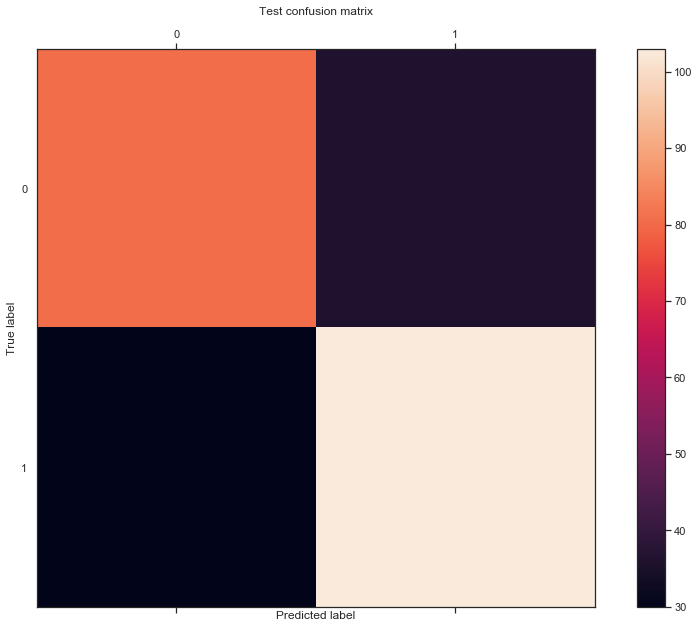

In [42]:
plt.figure(figsize=(15,10))
plt.matshow(linear_test_confusion_matrix, fignum=1)
plt.title('Test confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Evalutation results for test set:

In [43]:
print("Normalized accuracy score:", linear_test_normalized_acc)
print("F1 score:", linear_test_f1_score)
print("Precision:", linear_test_precision)
print("Recall:", linear_test_recall)

Normalized accuracy score: 0.736
F1 score: 0.7573529411764706
Precision: 0.7410071942446043
Recall: 0.7744360902255639


Unexpectedly, the model scored better on both normalized accuracy score and F1 score (measure of how well the model avoids false positive and false negatives) on the test data than on the training data. Generally, a decrease in evaluated accuracy is seen when a predictive model is tested on data it has not seen before than from when it is evalauted on data which it was trained on. It is reasonable to conclude that had our dataset before splitting been significantly larger or had we given more data to the test set (and hence sacrificed actual accuracy) we would see more accuracte results from evaluating on the training data than the test data.

### Cross-Validation

We will now train and evaluate a new, cross-validated model using all data:

In [44]:
y = pd.concat([train_y, test_y])
X = pd.concat([train_X, test_X])

In [45]:
y.head()

815    1
523    1
737    1
781    0
619    1
Name: RiskPerformance, dtype: int64

In [46]:
X.head()

,DelqEver,DelqLast12M,ExternalRiskEstimate,MSinceOldestTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTradesOpeninLast12M,PercentInstallTrades,NetFractionRevolvingBurden,PercentTradesWBalance
815,1,1,51,91,27,7,3,63,76,100
523,1,1,56,256,88,38,2,23,25,59
737,0,0,77,51,29,19,1,32,0,64
781,1,0,70,217,88,29,6,50,10,67
619,1,0,71,174,79,22,2,35,31,64


In [47]:
y.shape[0] #checking X and y have the same number of columns

833

In [48]:
X.shape[0]

833

As the LinearRegression estimator for sklearn's cross_validate function just makes probability predictions without a classification threshold, we will compare the model from above with this new model using typical linear regression evaluation metrics (mean absolute error, mean squared error and r squared).

In [49]:
metrics = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'] 
scores = cross_validate(LinearRegression(), X, y, scoring=metrics, cv=5)



scores

{'fit_time': array([0.00299144, 0.0009985 , 0.00199461, 0.00099754, 0.00099754]),
 'score_time': array([0.00202274, 0.00199294, 0.00199461, 0.00199461, 0.00199437]),
 'test_neg_mean_absolute_error': array([-0.38523255, -0.37135978, -0.37087571, -0.37579701, -0.33967274]),
 'train_neg_mean_absolute_error': array([-0.35380341, -0.36450187, -0.36103952, -0.36304523, -0.37085746]),
 'test_neg_mean_squared_error': array([-0.20686307, -0.18058661, -0.18534914, -0.18155976, -0.16464197]),
 'train_neg_mean_squared_error': array([-0.17276574, -0.17949808, -0.17744576, -0.17894061, -0.18301103]),
 'test_r2': array([0.17109137, 0.27700548, 0.25644388, 0.27281095, 0.32214642]),
 'train_r2': array([0.30788221, 0.27966263, 0.28929404, 0.2817821 , 0.26791474])}

In [50]:
cross_val_test_abs_err = (0.38523255 + 0.37135978 + 0.37087571 + 0.37579701 + 0.33967274)/5
cross_val_train_abs_err = (0.35380341 + 0.36450187 + 0.36103952 + 0.36304523 + 0.37085746)/5
cross_val_test_squared_err = (0.20686307 + 0.18058661 + 0.18534914 + 0.18155976 + 0.16464197)/5
cross_val_train_squared_err = (0.17276574 + 0.17949808 + 0.17744576 + 0.17894061 + 0.18301103)/5
cross_val_test_r2 = (0.17109137 + 0.27700548 + 0.25644388 + 0.27281095 + 0.32214642)/5
cross_val_train_r2 = (0.30788221 + 0.27966263 + 0.28929404 + 0.2817821 + 0.26791474)/5

In [51]:
from sklearn import metrics #neccesary to reimport sklearn

#testing first model using original probability predictions, no classification
mean_abs_err = metrics.mean_absolute_error(test['RiskPerformance'], test['LinearProbability'])
root_mean_squared_error = (metrics.mean_squared_error(test['RiskPerformance'], test['LinearProbability']))**0.5
r_squared_score = metrics.r2_score(test['RiskPerformance'], test['LinearProbability'])

Evaluation of results for original model predictions for unseen/test data:

In [52]:
print("Mean absolute error:", mean_abs_err)
print("Root mean squared error:", root_mean_squared_error)
print("R squared score:", r_squared_score)

Mean absolute error: 0.36332002306487327
Root mean squared error: 0.4188167300203169
R squared score: 0.2954844910958848


Evaluation results for cross-validated model predictions for unseen/test data:

In [53]:
print("Mean absolute error:", cross_val_test_abs_err)
print("Root mean squared error:", math.sqrt(cross_val_test_squared_err))
print("R squared score:", cross_val_test_r2)

Mean absolute error: 0.368587558
Root mean squared error: 0.4287191504936536
R squared score: 0.25989962


For both the test and training data, the mean absolute and root mean squared errors are lower for the original model than the cross-validated model, but for the root mean squared error the reverse is true. For all three measures however, the differences between models are not dramatic.

# Part III: Logistic Regression

We will now repeat the steps from part II for a multiple logistic model.

### Training

In [54]:
train_X = df[selected_columns]
train_y = df['RiskPerformance']

In [55]:
print("Rows in X:", train_X.shape[0])

Rows in X: 583


In [56]:
print("Rows in y:", train_y.shape[0])
train_y.head()

Rows in y: 583


815    1
523    1
737    1
781    0
619    1
Name: RiskPerformance, dtype: int64

### Prediction and Evaluation

Getting our logistic regression prediction model:

In [57]:
multiple_logreg = LogisticRegression().fit(train_X[selected_columns], train_y)

Our coefficients for the multiple logistic model are:

In [58]:
print("Features: \n", selected_columns)
print("\nCoeficients: \n", multiple_logreg.coef_)
print("\nIntercept: \n", multiple_logreg.intercept_)

Features: 
 Index(['DelqEver', 'DelqLast12M', 'ExternalRiskEstimate',
       'MSinceOldestTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades',
       'NumTradesOpeninLast12M', 'PercentInstallTrades',
       'NetFractionRevolvingBurden', 'PercentTradesWBalance'],
      dtype='object')

Coeficients: 
 [[ 0.95312488  0.13409815 -0.02774163 -0.00172591 -0.00480294 -0.04165779
   0.18243121  0.01098017  0.00850557  0.00634922]]

Intercept: 
 [1.61121557]


Like with we did for out linear model, we will use the coefficients and mean values for each feature to calculate it's average impact on our prediction to assess how important each feature generally is:

In [59]:
avg_DelqEver_effect = (df['DelqEver'].mean())*multiple_logreg.coef_[0][0]
avg_DelqLast12M_effect = (df['DelqLast12M'].mean())*multiple_logreg.coef_[0][1]
avg_ExternalRiskEstimate_effect = (df['ExternalRiskEstimate'].mean())*multiple_logreg.coef_[0][2]
avg_MSinceOldestTradeOpen_effect = (df['MSinceOldestTradeOpen'].mean())*multiple_logreg.coef_[0][3]
avg_AverageMInFile_effect = (df['AverageMInFile'].mean())*multiple_logreg.coef_[0][4]
avg_NumSatisfactoryTrades_effect = (df['NumSatisfactoryTrades'].mean())*multiple_logreg.coef_[0][5]
avg_NumTradesOpeninLast12M_effect = (df['NumTradesOpeninLast12M'].mean())*multiple_logreg.coef_[0][6]
avg_PercentInstallTrades_effect = (df['PercentInstallTrades'].mean())*multiple_logreg.coef_[0][7]
avg_NetFractionRevolvingBurden_effect = (df['NetFractionRevolvingBurden'].mean())*multiple_logreg.coef_[0][8]
avg_PercentTradesWBalance_effect = (df['PercentTradesWBalance'].mean())*multiple_logreg.coef_[0][9]

print("Average contribution of DelqEver to prediction:", avg_DelqEver_effect)
print("Average contribution of DelqLast12M to prediction:", avg_DelqLast12M_effect)
print("Average contribution of ExternalRiskEstimate to prediction:", avg_ExternalRiskEstimate_effect)
print("Average contribution of MSinceOldestTradeOpen to prediction:", avg_MSinceOldestTradeOpen_effect)
print("Average contribution of AverageMInFile to prediction:", avg_AverageMInFile_effect)
print("Average contribution of NumSatisfactoryTrades to prediction:", avg_NumSatisfactoryTrades_effect)
print("Average contribution of NumTradesOpeninLast12M to prediction:", avg_NumTradesOpeninLast12M_effect)
print("Average contribution of PercentInstallTrades to prediction:", avg_PercentInstallTrades_effect)
print("Average contribution of NetFractionRevolvingBurden to prediction:", avg_NetFractionRevolvingBurden_effect)
print("Average contribution of PercentTradesWBalance to prediction:", avg_PercentTradesWBalance_effect)

Average contribution of DelqEver to prediction: 0.5117119844317527
Average contribution of DelqLast12M to prediction: 0.03197194218472935
Average contribution of ExternalRiskEstimate to prediction: -1.9973971334945397
Average contribution of MSinceOldestTradeOpen to prediction: -0.34380928897385576
Average contribution of AverageMInFile to prediction: -0.379811102551888
Average contribution of NumSatisfactoryTrades to prediction: -0.845731735852384
Average contribution of NumTradesOpeninLast12M to prediction: 0.3482777662201233
Average contribution of PercentInstallTrades to prediction: 0.38875079743481505
Average contribution of NetFractionRevolvingBurden to prediction: 0.29804511292757746
Average contribution of PercentTradesWBalance to prediction: 0.41822092781258674


Similarly to with our linear model, we can see that the class prediction of our model is dominated by the RiskPerformance feature, the average effect of which is greater than the combined total of average effects of all predictors of the opposite class ('Bad'/1), demonstrated below:

In [60]:
avg_total_bad = avg_DelqEver_effect+avg_DelqLast12M_effect+avg_NumTradesOpeninLast12M_effect+avg_PercentInstallTrades_effect+avg_NetFractionRevolvingBurden_effect+avg_PercentTradesWBalance_effect
print("Average combined total of 'Bad' predictors:", avg_total_bad)

Average combined total of 'Bad' predictors: 1.9969785310115846


In [61]:
print("Average combined total of 'Bad' predictors and ExternalRiskEstimate:", avg_total_bad + avg_ExternalRiskEstimate_effect)

Average combined total of 'Bad' predictors and ExternalRiskEstimate: -0.0004186024829551105


However, unlike in our linear model, all of our other predictors (bar DelqLast12M) on average do still significantly contribute to the class prediction, all aside from DelqLast12M having their first significant figure no lower than the 1st decimal place. While ExternalRiskEstimate alone on average will result in a 'Good' prediction (producing less than 0 when subtracted from the intercept), it does not bring the prediction so far into the negative that it is unlikely to be rasied above 1 again by the remaining predictors.

We make our predictions with the model below:

In [62]:
multiple_logreg_predictions = multiple_logreg.predict(train_X[selected_columns])

df['LogisticalPrediction'] = multiple_logreg_predictions

df[['RiskPerformance','LogisticalPrediction']].head(100)

,RiskPerformance,LogisticalPrediction
815,1,1
523,1,0
737,1,0
781,0,1
619,1,1
729,1,1
370,0,0
151,0,1
73,0,0
331,0,1


In [63]:
from sklearn import metrics  #neccesary to reimport metrics
normalized_acc = metrics.accuracy_score(df['RiskPerformance'], df['LogisticalPrediction'])
confusion_matrix = metrics.confusion_matrix(df['RiskPerformance'], df['LogisticalPrediction'])
f1_score = metrics.f1_score(df['RiskPerformance'], df['LogisticalPrediction'])
precision = metrics.precision_score(df['RiskPerformance'], df['LogisticalPrediction'])
recall = metrics.recall_score(df['RiskPerformance'], df['LogisticalPrediction'])

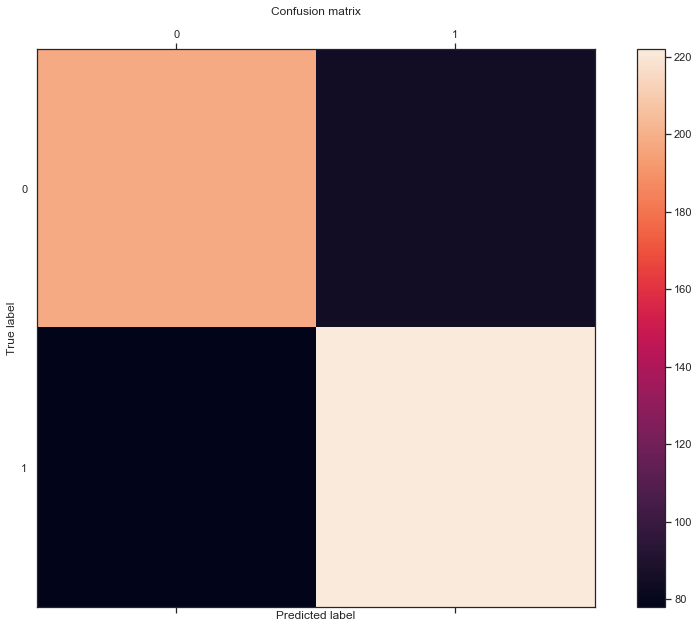

In [64]:
plt.figure(figsize=(15,10))
plt.matshow(confusion_matrix, fignum=1)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [65]:
print("Normalized accuracy score:", normalized_acc)
print("F1 score:", f1_score)
print("Precision:", precision)
print("Recall:", recall)

Normalized accuracy score: 0.7204116638078902
F1 score: 0.7314662273476112
Precision: 0.7231270358306189
Recall: 0.74


With a normalized accuracy score of ~0.72, our model correctly predicts RiskPerformance roughly 72% of the time. Recall is slightly higher than precision (0.74 compared to ~0.72), meaning that this model can be more safely relied on to correctly predict a 'Bad' RiskPerformance than not to incorrectly predict 'Bad' when RiskPerformance is actually 'Good'.

### Evaluate on Test Data

Performing the same evalution measures on the hold-out test set as were performed on the training set above:

In [66]:
test_X = test[selected_columns]
test_y = test.RiskPerformance

In [67]:
multiple_logreg_predictions = multiple_logreg.predict(test_X[selected_columns])

In [68]:
test['LogisticalPrediction'] = multiple_logreg_predictions

In [69]:
test[['RiskPerformance', 'LogisticalPrediction']].head(100)

,RiskPerformance,LogisticalPrediction
594,1,1
260,1,1
321,1,1
115,0,1
452,0,1
799,1,0
454,0,0
588,1,1
11,1,1
184,1,1


In [70]:
logistic_test_normalized_acc = metrics.accuracy_score(test['RiskPerformance'], test['LogisticalPrediction'])
logistic_test_confusion_matrix = metrics.confusion_matrix(test['RiskPerformance'], test['LogisticalPrediction'])
logistic_test_f1_score = metrics.f1_score(test['RiskPerformance'], test['LogisticalPrediction'])
logistic_test_precision = metrics.precision_score(test['RiskPerformance'], test['LogisticalPrediction'])
logistic_test_recall = metrics.recall_score(test['RiskPerformance'], test['LogisticalPrediction'])

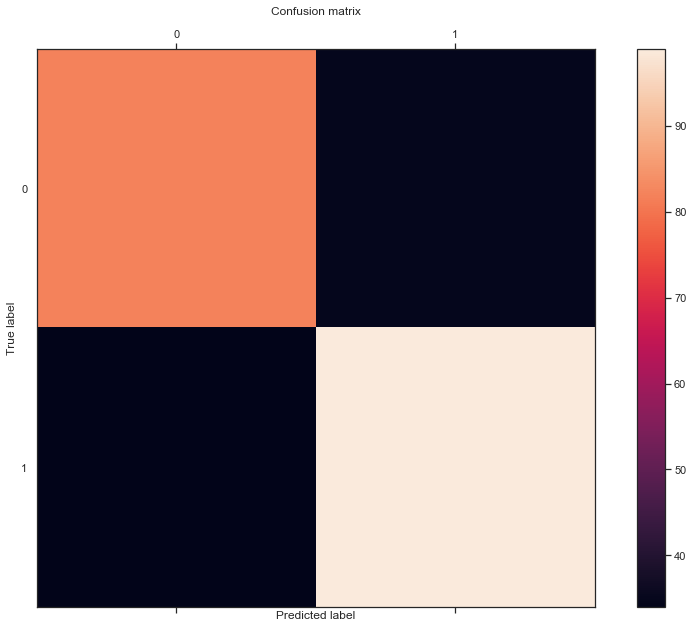

In [71]:
plt.figure(figsize=(15,10))
plt.matshow(logistic_test_confusion_matrix, fignum=1)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [72]:
print("Normalized accuracy score:", logistic_test_normalized_acc)
print("F1 score:", logistic_test_f1_score)
print("Precision:", logistic_test_precision)
print("Recall:", logistic_test_recall)

Normalized accuracy score: 0.724
F1 score: 0.7415730337078651
Precision: 0.7388059701492538
Recall: 0.7443609022556391


Strangely, our normalized accuracy and F1 scores are actually slightly higher from using the model to make predictions for the unseen/test data than the data it was actually trained on. This would probably not be the case if our sample size was higher, but in any case this is a good indication that our model's accuracy is not significantly impaired by overfeeding.

### Cross-Validation

In [73]:
y = pd.concat([train_y, test_y])
X = pd.concat([train_X, test_X])

In [74]:
metrics = ['accuracy', 'f1', 'precision', 'recall']
scores = cross_validate(LogisticRegression(), X, y, scoring=metrics, cv=5)
scores

{'fit_time': array([0.00399017, 0.00398898, 0.00498724, 0.00401616, 0.00496316]),
 'score_time': array([0.00398874, 0.00399256, 0.00299144, 0.00396228, 0.00301909]),
 'test_accuracy': array([0.68263473, 0.76047904, 0.7005988 , 0.72289157, 0.74698795]),
 'train_accuracy': array([0.74174174, 0.72822823, 0.72222222, 0.72563718, 0.72113943]),
 'test_f1': array([0.70391061, 0.77777778, 0.72222222, 0.73255814, 0.76404494]),
 'train_f1': array([0.75706215, 0.74326241, 0.73906911, 0.74188999, 0.73728814]),
 'test_precision': array([0.68478261, 0.75268817, 0.69892473, 0.73255814, 0.73913043]),
 'train_precision': array([0.74033149, 0.72980501, 0.72176309, 0.72651934, 0.72299169]),
 'test_recall': array([0.72413793, 0.8045977 , 0.74712644, 0.73255814, 0.79069767]),
 'train_recall': array([0.77456647, 0.75722543, 0.75722543, 0.75792507, 0.75216138])}

In [75]:
cross_val_test_acc = (0.68263473 + 0.76047904 + 0.7005988 + 0.72289157 + 0.74698795)/5
cross_val_train_acc = (0.74174174 + 0.72822823 + 0.72222222 + 0.72563718 + 0.72113943)/5
cross_val_test_f1 = (0.70391061 + 0.77777778 + 0.72222222 + 0.73255814 + 0.76404494)/5
cross_val_train_f1 = (0.74174174 + 0.72822823 + 0.72222222 + 0.72563718 + 0.72113943)/5
cross_val_test_prec = (0.68478261 + 0.75268817 + 0.69892473 + 0.73255814 + 0.73913043)/5
cross_val_train_prec = (0.74033149 + 0.72980501 + 0.72176309 + 0.72651934 + 0.72299169)/5
cross_val_test_rec = (0.72413793 + 0.8045977 + 0.74712644 + 0.73255814 + 0.79069767)/5
cross_val_train_rec = (0.77456647 + 0.75722543 + 0.75722543 + 0.75792507 + 0.75216138)/5

Evaluation of results for original model on unseen/test data:

In [76]:
print("Normalized accuracy score:", logistic_test_normalized_acc)
print("F1 score:", logistic_test_f1_score)
print("Precision:", logistic_test_precision)
print("Recall:", logistic_test_recall)

Normalized accuracy score: 0.724
F1 score: 0.7415730337078651
Precision: 0.7388059701492538
Recall: 0.7443609022556391


Evaluation results for cross-validated model on unseen/test data:

In [77]:
print("Normalize accuracy score:", cross_val_test_acc)
print("F1 score:", cross_val_test_f1)
print("Precision:", cross_val_test_prec)
print("Recall:", cross_val_test_rec)

Normalize accuracy score: 0.7227184179999999
F1 score: 0.740102738
Precision: 0.7216168159999999
Recall: 0.759823576


Overall, the original model has a slightly higher normalized accuracy and F1 score, but with slightly lower recall (and slightly higher precision). Again, the differences are relatively small - the predictions produced by either model would the same the overwhelming majoirty of the time with the difference in accuracy only being ~0.001.

# Part IV: Random Forests

We will now repeat the steps from part II and III for a random forests model.

### Training

In [78]:
rfc = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
rfc.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

### Evaluation and Predictions

In [79]:
importance_table = pd.DataFrame({'Feature': train_X.columns, 'Importance':rfc.feature_importances_})
importance_table.sort_values("Importance", axis = 0, inplace = True, na_position ='last', ascending = False) 
importance_table

,Feature,Importance
2,ExternalRiskEstimate,0.198561
4,AverageMInFile,0.139198
8,NetFractionRevolvingBurden,0.123038
3,MSinceOldestTradeOpen,0.116476
7,PercentInstallTrades,0.109526
5,NumSatisfactoryTrades,0.102933
9,PercentTradesWBalance,0.101089
6,NumTradesOpeninLast12M,0.049803
0,DelqEver,0.044119
1,DelqLast12M,0.015258


Random forests feature importance scores tells us how useful each predictor feature was in predicting the target feature by calculating how effective each predictive feature was over the decision tree splits in seperating the different classes of the target feature values.  

As shown above, the most important feature in this RandomForests model was ExternalRiskEstimate, with a lead of more than 0.15 on the second most important feature AverageMInFile. This is in keeping with the evaluation metrics from our linear and logistic models which also found that ExternalRiskEstimate was the main predictor for RiskPerformance class. Feature importance varies by no more than 0.025 for the 3rd to 7th most important features (NetFractionRevolvingBurden, MSinceOldestTradeOpen, PercentInstallTrades, NumSatisfactoryTrades, PercentTradesWBalance), then drops significantly by ~0.05 moving on to the 8th most important feature (NumTradesOpeninLast12M).

DelqEver, the 9th most important feature, is roughly 0.005 less than the 9th feature at ~0.04. It is interesting that DelqEver is the second least important feature in our random forests model as we found it to be relatively important for both of our previous models where it had the third largest effect of all predictors on average, although it is worth considering that sklearn's default random forests feature importance scores tend to overemphasise the effect of continuous variables while DelqEver is binary. The least important feature, DelqLast12M, has the lowest importance score by a significant margin, and is also a binary feature (although one which was also found to not to contribute greatly to the prediction in the other two models as well).

Making our predictions:

In [80]:
rfc.predict_proba(train_X)

array([[0.06, 0.94],
       [0.17, 0.83],
       [0.23, 0.77],
       ...,
       [0.12, 0.88],
       [0.17, 0.83],
       [0.96, 0.04]])

In [81]:
rfc_predictions = rfc.predict(train_X)
df['RFCPrediction'] = rfc_predictions
df[['RiskPerformance', 'RFCPrediction']].head(100)

,RiskPerformance,RFCPrediction
815,1,1
523,1,1
737,1,1
781,0,0
619,1,1
729,1,1
370,0,0
151,0,0
73,0,0
331,0,0


In [82]:
from sklearn import metrics
train_normalized_acc = metrics.accuracy_score(df['RiskPerformance'], df['RFCPrediction'])
train_confusion_matrix = metrics.confusion_matrix(df['RiskPerformance'], df['RFCPrediction'])
train_f1_score = metrics.f1_score(df['RiskPerformance'], df['RFCPrediction'])
train_precision = metrics.precision_score(df['RiskPerformance'], df['RFCPrediction'])
train_recall = metrics.recall_score(df['RiskPerformance'], df['RFCPrediction'])

In [83]:
print("Normalized accuracy score:", train_normalized_acc)
print("F1 score:", train_f1_score)
print("Precision:", train_precision)
print("Recall:", train_recall)

Normalized accuracy score: 1.0
F1 score: 1.0
Precision: 1.0
Recall: 1.0


It is not unusually for a random forests prediction model to have a near-zero prediction error for training data, so these scores, while telling us nothing as to the real accuracy of the model if given unseen data, are not particularly strange.

### Evaluation on Test Dataset

In [84]:
rfc_predictions = rfc.predict(test_X)
test['RFCPrediction'] = rfc_predictions
test[['RiskPerformance', 'RFCPrediction']].head(100)

,RiskPerformance,RFCPrediction
594,1,1
260,1,1
321,1,1
115,0,1
452,0,0
799,1,1
454,0,0
588,1,1
11,1,1
184,1,1


In [85]:
from sklearn import metrics
rf_test_normalized_acc = metrics.accuracy_score(test['RiskPerformance'], test['RFCPrediction'])
rf_test_confusion_matrix = metrics.confusion_matrix(test['RiskPerformance'], test['RFCPrediction'])
rf_test_f1_score = metrics.f1_score(test['RiskPerformance'], test['RFCPrediction'])
rf_test_precision = metrics.precision_score(test['RiskPerformance'], test['RFCPrediction'])
rf_test_recall = metrics.recall_score(test['RiskPerformance'], test['RFCPrediction'])

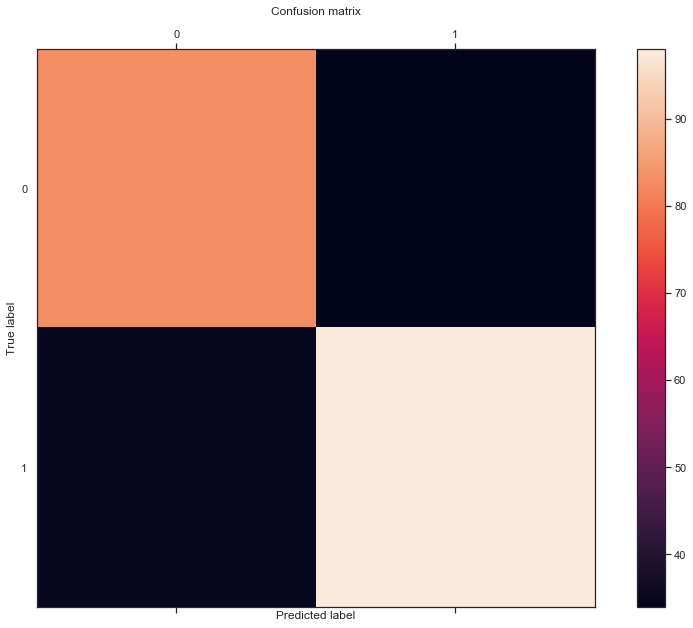

In [86]:
plt.figure(figsize=(15,10))
plt.matshow(rf_test_confusion_matrix, fignum=1)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [87]:
print("Normalized accuracy score:", rf_test_normalized_acc)
print("F1 score:", rf_test_f1_score)
print("Precision:", rf_test_precision)
print("Recall:", rf_test_recall)

Normalized accuracy score: 0.724
F1 score: 0.739622641509434
Precision: 0.7424242424242424
Recall: 0.7368421052631579


Now we can get a real idea of the accuracy of our random forests model. As seen above, the normalized accuracy score for the model is 0.724, hence we can state that the model correctly identifies the class of the target feature based on the predictor features roughly 72% of the time. Precision is slightly better than recall, i.e. predictions of 'Bad' RiskPerformance are more likely to be false negatives than false positives.

### Cross-Validation

In [88]:
metrics = ['accuracy', 'f1', 'precision', 'recall']
scores = cross_validate(RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1), X, y, scoring=metrics, cv=5)
scores

{'fit_time': array([0.10374951, 0.10671449, 0.10173106, 0.10372329, 0.10572553]),
 'score_time': array([0.02792215, 0.0289228 , 0.02795243, 0.02889442, 0.02892113]),
 'test_accuracy': array([0.64670659, 0.74251497, 0.67065868, 0.77108434, 0.75903614]),
 'train_accuracy': array([1., 1., 1., 1., 1.]),
 'test_f1': array([0.67403315, 0.77005348, 0.68926554, 0.78888889, 0.76470588]),
 'train_f1': array([1., 1., 1., 1., 1.]),
 'test_precision': array([0.64893617, 0.72      , 0.67777778, 0.75531915, 0.77380952]),
 'train_precision': array([1., 1., 1., 1., 1.]),
 'test_recall': array([0.70114943, 0.82758621, 0.70114943, 0.8255814 , 0.75581395]),
 'train_recall': array([1., 1., 1., 1., 1.])}

In [89]:
cross_val_test_acc = (scores['test_accuracy'][0] + scores['test_accuracy'][1] + scores['test_accuracy'][2] + scores['test_accuracy'][3] + scores['test_accuracy'][4])/5
cross_val_train_acc = (scores['train_accuracy'][0] + scores['train_accuracy'][1] + scores['train_accuracy'][2] + scores['train_accuracy'][3] + scores['train_accuracy'][4])/5
cross_val_train_f1 = (scores['train_f1'][0] + scores['train_f1'][1] + scores['train_f1'][2] + scores['train_f1'][3] + scores['train_f1'][4])/5
cross_val_test_f1 = (scores['test_f1'][0] + scores['test_f1'][1] + scores['test_f1'][2] + scores['test_f1'][3] + scores['test_f1'][4])/5
cross_val_train_prec = (scores['train_precision'][0] + scores['train_precision'][1] + scores['train_precision'][2] + scores['train_precision'][3] + scores['train_precision'][4])/5
cross_val_test_prec = (scores['test_precision'][0] + scores['test_precision'][1] + scores['test_precision'][2] + scores['test_precision'][3] + scores['test_precision'][4])/5
cross_val_train_rec = (scores['train_recall'][0] + scores['train_recall'][1] + scores['train_recall'][2] + scores['train_recall'][3] + scores['train_recall'][4])/5
cross_val_test_rec = (scores['test_recall'][0] + scores['test_recall'][1] + scores['test_recall'][2] + scores['test_recall'][3] + scores['test_recall'][4])/5

Evaluation of results for original model for unseen/test set data:

In [90]:
print("Normalized accuracy score:", rf_test_normalized_acc)
print("F1 score:", rf_test_f1_score)
print("Precision:", rf_test_precision)
print("Recall:", rf_test_recall)

Normalized accuracy score: 0.724
F1 score: 0.739622641509434
Precision: 0.7424242424242424
Recall: 0.7368421052631579


Evaluation results for cross-validated model predicting for unseen/test data:

In [91]:
print("Normalize accuracy score:", cross_val_test_acc)
print("F1 score:", cross_val_test_f1)
print("Precision:", cross_val_test_prec)
print("Recall:", cross_val_test_rec)

Normalize accuracy score: 0.7180001442897338
F1 score: 0.7373893866144187
Precision: 0.7151685241472474
Recall: 0.7622560812616948


The original model has a slightly higher normalized accuracy score and F1 score than the cross-validated model and is the overall better model. The only advantage of the cross-validated model is that it has significantly higher recall, but at the cost of significantly lower precision. Again, the differences are not dramatic.

# Part V: Improving Predictive Models

### Model Comparisons

We will now compare our original models created for each modelling approach (linear and logistic regression and random forests) to see which produces the overall best predictions.

In [92]:
print("Normalized accuracy score")
print("-----------------------------------")
print("Linear regression model:", linear_test_normalized_acc)
print("Logistic regression model:", logistic_test_normalized_acc)
print("Random forests model:", rf_test_normalized_acc)
print()
print()
print("F1 score")
print("-----------------------------------")
print("Linear regression model:", linear_test_f1_score)
print("Logistic regression model:", logistic_test_f1_score)
print("Random forests model:", rf_test_f1_score)
print()
print()
print("Precision")
print("-----------------------------------")
print("Linear regression model:", linear_test_precision)
print("Logistic regression model:", logistic_test_precision)
print("Random forests model:", rf_test_precision)
print()
print()
print("Recall")
print("-----------------------------------")
print("Linear regression model:", linear_test_recall)
print("Logistic regression model:", logistic_test_recall)
print("Random forests model:", rf_test_recall)


Normalized accuracy score
-----------------------------------
Linear regression model: 0.736
Logistic regression model: 0.724
Random forests model: 0.724


F1 score
-----------------------------------
Linear regression model: 0.7573529411764706
Logistic regression model: 0.7415730337078651
Random forests model: 0.739622641509434


Precision
-----------------------------------
Linear regression model: 0.7410071942446043
Logistic regression model: 0.7388059701492538
Random forests model: 0.7424242424242424


Recall
-----------------------------------
Linear regression model: 0.7744360902255639
Logistic regression model: 0.7443609022556391
Random forests model: 0.7368421052631579


Across all metrics but precision, the multiple linear regression model is the most accurate. Even for precision, multiple linear regression is only approximately 0.001 less than random forests. We will now compare this multiple linear regression model with a simple model that always predicts the most common class for the sake of benchmarking.

Creating the simple model:

In [93]:
df.head()

,RiskPerformanceNonDummy,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,TradeFreq,NumTotalDelqTrades,percent,DelqLast12M,DelqEver,RiskPerformance,LinearProbability,LinearPrediction,LogisticalPrediction,RFCPrediction
815,Bad,51,91,5,27,7,2,2,75,3,...,98,3,0.719424,1,1,1,1.151273,1.0,1,1
523,Bad,56,256,5,88,38,0,0,79,4,...,152,9,0.719424,1,1,1,0.547919,1.0,0,1
737,Bad,77,51,4,29,19,0,0,100,122,...,423,0,0.225225,0,0,1,0.405339,0.0,0,1
781,Good,70,217,3,88,29,1,1,93,24,...,142,3,0.225225,0,1,0,0.657226,1.0,1,0
619,Bad,71,174,8,79,22,1,1,87,25,...,131,3,0.225225,0,1,1,0.594158,1.0,1,1


In [94]:
df['RiskPerformance'].mean()

0.5145797598627787

In [95]:
test['RiskPerformance'].mean()

0.532

As our mean for risk performance is greater than 0.5, we can conclude that the more common feature is 'Bad'/1. Our simple model will therefore predict a value of 1 for RiskPerformance everytime.

Creating and evaluating a model which always predicts 'Bad' RiskPerformance:

In [96]:
test['SimplePrediction'] = 1
test[['RiskPerformance','SimplePrediction']].head(100)

,RiskPerformance,SimplePrediction
594,1,1
260,1,1
321,1,1
115,0,1
452,0,1
799,1,1
454,0,1
588,1,1
11,1,1
184,1,1


In [97]:
from sklearn import metrics
simple_normalized_acc = metrics.accuracy_score(test['RiskPerformance'], test['SimplePrediction'])
simple_f1_score = metrics.f1_score(test['RiskPerformance'], test['SimplePrediction'])
simple_precision = metrics.precision_score(test['RiskPerformance'], test['SimplePrediction'])
simple_recall = metrics.recall_score(test['RiskPerformance'], test['SimplePrediction'])

Simple model evaluated on test data:

In [98]:
print("Normalized accuracy score:", simple_normalized_acc)
print("F1 score:", simple_f1_score)
print("Precision:", simple_precision)
print("Recall:", simple_recall)

Normalized accuracy score: 0.532
F1 score: 0.6945169712793734
Precision: 0.532
Recall: 1.0


Evaluation metrics for our best model (multiple linear regression) on test data:

In [99]:
print("Normalized accuracy score:", linear_test_normalized_acc)
print("F1 score:", linear_test_f1_score)
print("Precision:", linear_test_precision)
print("Recall:", linear_test_recall)

Normalized accuracy score: 0.736
F1 score: 0.7573529411764706
Precision: 0.7410071942446043
Recall: 0.7744360902255639


The multiple linear regression model has a very significant lead on the simple model across all metrics (0.204 for accuracy and  on the simple model across all metrics and ~0.06 for F1 score), bar of course recall for which the simple model has a perfect score (as it always predicts 'Bad' RiskPerformance, it cannot have a false negative prediction).

### Findings Thus Far

Thus far in this notebook, we have been attempting to solve the problem of how best to predict based on information for a given set of features (MaxDelqEver, AverageMInFile, etc.) the value/class of the target feature RiskPerformance (a binary feature which can be either "Bad" or "Good", although we changed these values to 1 and 0 respectively for the purposes of training our models). We used three different modelling methods in approaching this problem: multiple linear regression, multiple logistic regression and random forests. 

Before training our models for each approach however, we selected which features to use as predictors for the target feature. The features ultimately selected were ExternalRiskEstimate, MSinceOldestTradeOpen, AverageMInFile, NumSatisfactoryTrades, NumTradesOpeninLast12M, PercentInstallTrades, NetFractionRevolvingBurden, PercentTradesWBalance, DelqEver and DelqLast12M as these features appeared from plotting them against the target feature RiskPerformance to have the highest correlation with one of it's binary values.

We trained a model for each of the three approaches using two different methods: automatically shuffling the data into a training and test dataset and cross validation. In the former, we used sklearn's train_test_split() function to randomly split our data 70%/30% into a trainng and test set respectively, using the former to train the model and the latter as unseen data for testing the model. For training and testing our models using cross-validation, we used sklearn's cross_validate() function. For each modelling technique, the former approach yielded more accurate results across most evaluation metrics.     

Comparing the models trained and tested with the train_test_split() function, the multiple linear regression model was found to be the most accurate across all metrics bar precision, and even then it scored only slightly less than the highest. In the rest of this section, we will experiment with ways the predictions of this model could be even further improved.

### Experimenting with Different Approaches

We will now try some different approaches to training our most effective model, the linear regression, to see if we can further improve it.

First, we will try a multiple linear regression using all features, not just the subset selected in part I:

In [100]:
df.columns

Index(['RiskPerformanceNonDummy', 'ExternalRiskEstimate',
       'MSinceOldestTradeOpen', 'MSinceMostRecentTradeOpen', 'AverageMInFile',
       'NumSatisfactoryTrades', 'NumTrades60Ever2DerogPubRec',
       'NumTrades90Ever2DerogPubRec', 'PercentTradesNeverDelq',
       'MSinceMostRecentDelq', 'MaxDelq2PublicRecLast12M', 'MaxDelqEver',
       'NumTradesOpeninLast12M', 'PercentInstallTrades',
       'MSinceMostRecentInqexcl7days', 'NumInqLast6M',
       'NetFractionRevolvingBurden', 'NetFractionInstallBurden',
       'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance',
       'NumBank2NatlTradesWHighUtilization', 'PercentTradesWBalance',
       'DelqEverNonDummy', 'DelqLast12MNonDummy', 'PercentSatisfactoryTrades',
       'TradeFreq', 'NumTotalDelqTrades', 'percent', 'DelqLast12M', 'DelqEver',
       'RiskPerformance', 'LinearProbability', 'LinearPrediction',
       'LogisticalPrediction', 'RFCPrediction'],
      dtype='object')

In [101]:
#NetFractionInstallBurden not included due to NaN values

all_predictors = df[['ExternalRiskEstimate',
       'MSinceOldestTradeOpen', 'MSinceMostRecentTradeOpen', 'AverageMInFile',
       'NumSatisfactoryTrades', 'NumTrades60Ever2DerogPubRec',
       'NumTrades90Ever2DerogPubRec', 'PercentTradesNeverDelq',
       'MSinceMostRecentDelq', 'MaxDelq2PublicRecLast12M', 'MaxDelqEver',
       'NumTradesOpeninLast12M', 'PercentInstallTrades',
       'MSinceMostRecentInqexcl7days', 'NumInqLast6M',
       'NetFractionRevolvingBurden',
       'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance',
       'NumBank2NatlTradesWHighUtilization', 'PercentTradesWBalance',
       'PercentSatisfactoryTrades', 'TradeFreq', 'NumTotalDelqTrades',
       'DelqLast12M', 'DelqEver']].columns

Training the new model with all predictors:

In [102]:
all_X_train = df[all_predictors]
all_X_test = test[all_predictors]

multiple_linreg = LinearRegression().fit(all_X_train[all_predictors], train_y)

Testing the new model:

In [103]:
multiple_linreg_predictions = multiple_linreg.predict(all_X_test[all_predictors])

test['LinearProbabilityAll'] = multiple_linreg_predictions

test['LinearPredictionAll'] = test['LinearProbabilityAll']

test['LinearPredictionAll'][(test['LinearPredictionAll'] >= 0.5)] = 1

test['LinearPredictionAll'][test['LinearPredictionAll'] != 1] = 0

test[['LinearProbabilityAll', 'LinearPredictionAll', 'RiskPerformance']].head()

,LinearProbabilityAll,LinearPredictionAll,RiskPerformance
594,0.563410,1.0,1
260,1.011856,1.0,1
321,0.583499,1.0,1
115,0.519382,1.0,0
452,0.484905,0.0,0


In [104]:
normalized_acc_all = metrics.accuracy_score(test['LinearPredictionAll'], test['RiskPerformance'])
f1_score_all = metrics.f1_score(test['RiskPerformance'],test['LinearPredictionAll'])
precision_all = metrics.precision_score(test['RiskPerformance'], test['LinearPredictionAll'])
recall_all = metrics.recall_score(test['RiskPerformance'], test['LinearPredictionAll'])

Comparing evaluation metrics:

In [105]:
print("Normalized accuracy score")
print("-----------------------------------")
print("Multiple linear regression model (all features):", normalized_acc_all)
print("Multiple linear regression model (selected features):", linear_test_normalized_acc)
print()
print()
print("F1 score")
print("-----------------------------------")
print("Multiple linear regression model (all features):", f1_score_all)
print("Multiple linear regression model (selected features):", linear_test_f1_score)
print()
print()
print("Precision")
print("-----------------------------------")
print("Multiple linear regression model (all features):", precision_all)
print("Multiple linear regression model (selected features):", linear_test_precision)
print()
print()
print("Recall")
print("-----------------------------------")
print("Multiple linear regression model (all features):", recall_all)
print("Multiple linear regression model (selected features):", linear_test_recall)


Normalized accuracy score
-----------------------------------
Multiple linear regression model (all features): 0.744
Multiple linear regression model (selected features): 0.736


F1 score
-----------------------------------
Multiple linear regression model (all features): 0.7611940298507462
Multiple linear regression model (selected features): 0.7573529411764706


Precision
-----------------------------------
Multiple linear regression model (all features): 0.7555555555555555
Multiple linear regression model (selected features): 0.7410071942446043


Recall
-----------------------------------
Multiple linear regression model (all features): 0.7669172932330827
Multiple linear regression model (selected features): 0.7744360902255639


As can be seen by comparing the two sets of evaluation metrics above, a multiple linear regression model actually gives more accurate predictions, scoring higher across all metrics bar recall, when given all predictors (except NetFractionInstallBurden) rather than our selected predictive features. However, the results chosen are still very similar, so it can reasonably be concluded that most important features were not missed in our original feature selection.

ExternalRiskEstimate was in all of our approaches the most important predictive factor, so we will now investigate how accurately a simple linear regression model with just this feature can predict RiskPerformance:

In [106]:
simple_linreg = LinearRegression().fit(df['ExternalRiskEstimate'].values.reshape(-1,1), train_y)

In [107]:
simple_linreg_predictions = simple_linreg.predict(test['ExternalRiskEstimate'].values.reshape(-1,1))

test['SimpleLinearProbability'] = simple_linreg_predictions

test['SimpleLinearPrediction'] = test['SimpleLinearProbability']

test['SimpleLinearPrediction'][(test['SimpleLinearPrediction'] >= 0.5)] = 1

test['SimpleLinearPrediction'][test['SimpleLinearPrediction'] != 1] = 0

In [108]:
simple_normalized_acc = metrics.accuracy_score(test['RiskPerformance'], test['SimpleLinearPrediction'])
simple_f1_score = metrics.f1_score(test['RiskPerformance'], test['SimpleLinearPrediction'])
simple_precision = metrics.precision_score(test['RiskPerformance'], test['SimpleLinearPrediction'])
simple_recall = metrics.recall_score(test['RiskPerformance'], test['SimpleLinearPrediction'])

Below, we compare the evaluation metrics of the simple linear regression and original multiple linear regression model:

In [109]:
print("Normalized accuracy score")
print("-----------------------------------")
print("Simple linear regression model:", simple_normalized_acc)
print("Multiple linear regression model (selected features):", linear_test_normalized_acc)
print()
print()
print("F1 score")
print("-----------------------------------")
print("Simple linear regression model:", simple_f1_score)
print("Multiple linear regression model (selected features):", linear_test_f1_score)
print()
print()
print("Precision")
print("-----------------------------------")
print("Simple linear regression model:", simple_precision)
print("Multiple linear regression model (selected features):", linear_test_precision)
print()
print()
print("Recall")
print("-----------------------------------")
print("Simple linear regression model:", simple_recall)
print("Multiple linear regression model (selected features):", linear_test_recall)


Normalized accuracy score
-----------------------------------
Simple linear regression model: 0.736
Multiple linear regression model (selected features): 0.736


F1 score
-----------------------------------
Simple linear regression model: 0.7421875
Multiple linear regression model (selected features): 0.7573529411764706


Precision
-----------------------------------
Simple linear regression model: 0.7723577235772358
Multiple linear regression model (selected features): 0.7410071942446043


Recall
-----------------------------------
Simple linear regression model: 0.7142857142857143
Multiple linear regression model (selected features): 0.7744360902255639


Interestingly, the normalized accuracy of the simple regression ended up being identical to the accuracy score of the multiple linear regression model using the originally selected features. However, the F1 score for the multiple linear regression model is ~ 0.015 higher than the single linear regression, with it's recall being higher and precision lower. These metrics support the claims made earlier in this notebook that a linear regression model using only ExternalRiskEstimate would have around the same effectiveness as the multiple linear regression using the selected features.

Before concluding, we will evaluate our logistic regression and random forests models using all features as well: 

In [110]:
multiple_logreg = LogisticRegression().fit(all_X_train[all_predictors], train_y)

In [111]:
multiple_logreg_predictions = multiple_logreg.predict(all_X_test[all_predictors])

In [112]:
test['LogisticalPredictionAll'] = multiple_logreg_predictions

In [113]:
logistic_normalized_acc_all = metrics.accuracy_score(test['RiskPerformance'], test['LogisticalPredictionAll'])
logistic_f1_score_all = metrics.f1_score(test['RiskPerformance'], test['LogisticalPredictionAll'])
logistic_precision_all = metrics.precision_score(test['RiskPerformance'], test['LogisticalPredictionAll'])
logistic_recall_all = metrics.recall_score(test['RiskPerformance'], test['LogisticalPredictionAll'])

In [114]:
rfc = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
rfc.fit(all_X_train, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [115]:
rfc_predictions = rfc.predict(all_X_test)
test['RFCPredictionAll'] = rfc_predictions

In [116]:
rf_normalized_acc_all = metrics.accuracy_score(test['RiskPerformance'], test['RFCPredictionAll'])
rf_f1_score_all = metrics.f1_score(test['RiskPerformance'], test['RFCPredictionAll'])
rf_precision_all = metrics.precision_score(test['RiskPerformance'], test['RFCPredictionAll'])
rf_recall_all = metrics.recall_score(test['RiskPerformance'], test['RFCPredictionAll'])

Comparing each modelling approach using all predictors (except NetFractionInstallBurden):

In [117]:
print("Normalized accuracy score")
print("-----------------------------------")
print("Random forests model:", rf_normalized_acc_all)
print("Multiple logistic regression model:", logistic_normalized_acc_all)
print("Multiple linear regression model:", normalized_acc_all)
print()
print()
print("F1 score")
print("-----------------------------------")
print("Simple linear regression model:", rf_f1_score_all)
print("Random forests model:", logistic_f1_score_all)
print("Multiple linear regression model:", f1_score_all)
print()
print()
print("Precision")
print("-----------------------------------")
print("Simple linear regression model:", rf_precision_all)
print("Random forests model:", logistic_precision_all)
print("Multiple linear regression model:", precision_all)
print()
print()
print("Recall")
print("-----------------------------------")
print("Simple linear regression model:", rf_recall_all)
print("Random forests model:", logistic_recall_all)
print("Multiple linear regression model:", recall_all)


Normalized accuracy score
-----------------------------------
Random forests model: 0.74
Multiple logistic regression model: 0.728
Multiple linear regression model: 0.744


F1 score
-----------------------------------
Simple linear regression model: 0.752851711026616
Random forests model: 0.7424242424242424
Multiple linear regression model: 0.7611940298507462


Precision
-----------------------------------
Simple linear regression model: 0.7615384615384615
Random forests model: 0.7480916030534351
Multiple linear regression model: 0.7555555555555555


Recall
-----------------------------------
Simple linear regression model: 0.7443609022556391
Random forests model: 0.7368421052631579
Multiple linear regression model: 0.7669172932330827


Using all features as predictors (except NetFractionInstallBurden), multiple linear regression is still the most effective approach for predicting RiskPerformance measured by both normalized accuracy and F1 scores (although it is also the least precise).

### Conclusion

In summary, the best solution that has been found through the investigations carried out in this report to the problem of predicting RiskPerformance from the features given in our original dataset is to carry out multiple linear regression using all predictor features (bar NetFractionInstallBurden, due to this feature containing NaN values), which has been evaluated on unseen data as being approximately 74.3 % accurate with an F1 score of approximately 0.76.